In [64]:
#imports

import pandas as pd
from scipy.stats import linregress
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet, LassoCV, Ridge


In [65]:
# Loading dataset
raw=pd.read_csv('./algerianForest.csv')


In [66]:
raw

Bejaia Region Dataset 
day month year Temperature  RH  Ws Rain  FFMC DMC DC   ISI BUI  FWI              Classes  
01  06    2012 29          57  18  0     65.7 3.4 7.6  1.3 3.4  0.5            not fire   
02  06    2012 29          61  13  1.3   64.4 4.1 7.6  1   3.9  0.4            not fire   
03  06    2012 26          82  22  13.1  47.1 2.5 7.1  0.3 2.7  0.1            not fire   
04  06    2012 25          89  13  2.5   28.6 1.3 6.9  0   1.7  0              not fire   
...                                                                                    ...
26  09    2012 30          65  14  0     85.4 16  44.5 4.5 16.9 6.5                fire   
27  09    2012 28          87  15  4.4   41.1 6.5 8    0.1 6.2  0              not fire   
28  09    2012 27          87  29  0.5   45.9 3.5 7.9  0.4 3.4  0.2            not fire   
29  09    2012 24          54  18  0.1   79.7 4.3 15.2 1.7 5.1  0.7            not fire   
30  09    2012 24          64  15  0.2   67.3 3.8 16.5 1.2 4.8  0.5           not fire    

[247 rows x 1 columns]

In [67]:

df=raw.reset_index()
df.columns=df.iloc[0]
df=df.drop(0)
df
#basic setup

0   day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
1    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
2    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
3    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
4    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
5    05    06  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
242  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
243  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
244  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
245  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
246  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

0    FWI     Classes    
1    0.5   not fire     
2    0.4   not fire     
3    0.1   not fire     
4      0   not fire     
5    0.5   not fire     
..   ...           ...  
242  6.5       fire     
243    0   not fire     
244  0.2   not fire     
245  0.7   not fire     
246  0.5  not fire      

[246 rows x 14 columns]

In [68]:
# Missing value
for col in df.columns:
    print(col)
    display(df[df[col].isna()])

day


Empty DataFrame
Columns: [day, month, year, Temperature,  RH,  Ws, Rain , FFMC, DMC, DC, ISI, BUI, FWI, Classes  ]
Index: []

month


0                              day month year Temperature   RH   Ws Rain   \
123  Sidi-Bel Abbes Region Dataset   NaN  NaN         NaN  NaN  NaN   NaN   

0   FFMC  DMC   DC  ISI  BUI  FWI Classes    
123  NaN  NaN  NaN  NaN  NaN  NaN       NaN

year


0                              day month year Temperature   RH   Ws Rain   \
123  Sidi-Bel Abbes Region Dataset   NaN  NaN         NaN  NaN  NaN   NaN   

0   FFMC  DMC   DC  ISI  BUI  FWI Classes    
123  NaN  NaN  NaN  NaN  NaN  NaN       NaN

Temperature


0                              day month year Temperature   RH   Ws Rain   \
123  Sidi-Bel Abbes Region Dataset   NaN  NaN         NaN  NaN  NaN   NaN   

0   FFMC  DMC   DC  ISI  BUI  FWI Classes    
123  NaN  NaN  NaN  NaN  NaN  NaN       NaN

 RH


0                              day month year Temperature   RH   Ws Rain   \
123  Sidi-Bel Abbes Region Dataset   NaN  NaN         NaN  NaN  NaN   NaN   

0   FFMC  DMC   DC  ISI  BUI  FWI Classes    
123  NaN  NaN  NaN  NaN  NaN  NaN       NaN

 Ws


0                              day month year Temperature   RH   Ws Rain   \
123  Sidi-Bel Abbes Region Dataset   NaN  NaN         NaN  NaN  NaN   NaN   

0   FFMC  DMC   DC  ISI  BUI  FWI Classes    
123  NaN  NaN  NaN  NaN  NaN  NaN       NaN

Rain 


0                              day month year Temperature   RH   Ws Rain   \
123  Sidi-Bel Abbes Region Dataset   NaN  NaN         NaN  NaN  NaN   NaN   

0   FFMC  DMC   DC  ISI  BUI  FWI Classes    
123  NaN  NaN  NaN  NaN  NaN  NaN       NaN

FFMC


0                              day month year Temperature   RH   Ws Rain   \
123  Sidi-Bel Abbes Region Dataset   NaN  NaN         NaN  NaN  NaN   NaN   

0   FFMC  DMC   DC  ISI  BUI  FWI Classes    
123  NaN  NaN  NaN  NaN  NaN  NaN       NaN

DMC


0                              day month year Temperature   RH   Ws Rain   \
123  Sidi-Bel Abbes Region Dataset   NaN  NaN         NaN  NaN  NaN   NaN   

0   FFMC  DMC   DC  ISI  BUI  FWI Classes    
123  NaN  NaN  NaN  NaN  NaN  NaN       NaN

DC


0                              day month year Temperature   RH   Ws Rain   \
123  Sidi-Bel Abbes Region Dataset   NaN  NaN         NaN  NaN  NaN   NaN   

0   FFMC  DMC   DC  ISI  BUI  FWI Classes    
123  NaN  NaN  NaN  NaN  NaN  NaN       NaN

ISI


0                              day month year Temperature   RH   Ws Rain   \
123  Sidi-Bel Abbes Region Dataset   NaN  NaN         NaN  NaN  NaN   NaN   

0   FFMC  DMC   DC  ISI  BUI  FWI Classes    
123  NaN  NaN  NaN  NaN  NaN  NaN       NaN

BUI


0                              day month year Temperature   RH   Ws Rain   \
123  Sidi-Bel Abbes Region Dataset   NaN  NaN         NaN  NaN  NaN   NaN   

0   FFMC  DMC   DC  ISI  BUI  FWI Classes    
123  NaN  NaN  NaN  NaN  NaN  NaN       NaN

FWI


0                              day month year Temperature   RH   Ws Rain   \
123  Sidi-Bel Abbes Region Dataset   NaN  NaN         NaN  NaN  NaN   NaN   

0   FFMC  DMC   DC  ISI  BUI  FWI Classes    
123  NaN  NaN  NaN  NaN  NaN  NaN       NaN

Classes  


0                              day month  year Temperature   RH   Ws Rain   \
123  Sidi-Bel Abbes Region Dataset   NaN   NaN         NaN  NaN  NaN   NaN   
168                             14    07  2012          37   37   18   0.2   

0    FFMC   DMC      DC   ISI   BUI      FWI Classes    
123   NaN   NaN     NaN   NaN   NaN      NaN       NaN  
168  88.9  12.9  14.6 9  12.5  10.4  fire          NaN

In [69]:
sidi_bel=df.iloc[124:]
sidi_bel.reset_index(drop=True,inplace=True)
sidi_bel

0   day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
0    01    06  2012          32  71  12   0.7  57.1  2.5   8.2  0.6   2.8   
1    02    06  2012          30  73  13     4  55.7  2.7   7.8  0.6   2.9   
2    03    06  2012          29  80  14     2  48.7  2.2   7.6  0.3   2.6   
3    04    06  2012          30  64  14     0  79.4  5.2  15.4  2.2   5.6   
4    05    06  2012          32  60  14   0.2  77.1    6  17.6  1.8   6.5   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
117  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
118  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
119  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
120  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
121  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

0    FWI     Classes    
0    0.2   not fire     
1    0.2   not fire     
2    0.1   not fire     
3      1   not fire     
4    0.9   not fire     
..   ...           ...  
117  6.5       fire     
118    0   not fire     
119  0.2   not fire     
120  0.7   not fire     
121  0.5  not fire      

[122 rows x 14 columns]

In [70]:
Bejaia=df.iloc[:122]
Bejaia.reset_index(drop=True,inplace=True)
Bejaia

0   day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4    05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...  ...  ...   
117  26    09  2012          31  54  11     0    82    6  16.3  2.5  6.2  1.7   
118  27    09  2012          31  66  11     0  85.7  8.3  24.9    4    9  4.1   
119  28    09  2012          32  47  14   0.7  77.5  7.1   8.8  1.8  6.8  0.9   
120  29    09  2012          26  80  16   1.8  47.4  2.9   7.7  0.3    3  0.1   
121  30    09  2012          25  78  14   1.4    45  1.9   7.5  0.2  2.4  0.1   

0      Classes    
0    not fire     
1    not fire     
2    not fire     
3    not fire     
4    not fire     
..           ...  
117  not fire     
118      fire     
119  not fire     
120  not fire     
121  not fire     

[122 rows x 14 columns]

In [71]:
df=pd.concat([Bejaia,sidi_bel])
df.reset_index(drop=True,inplace=True)
df

0   day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
0    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4    05    06  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
239  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
240  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
241  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
242  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
243  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

0    FWI     Classes    
0    0.5   not fire     
1    0.4   not fire     
2    0.1   not fire     
3      0   not fire     
4    0.5   not fire     
..   ...           ...  
239  6.5       fire     
240    0   not fire     
241  0.2   not fire     
242  0.7   not fire     
243  0.5  not fire      

[244 rows x 14 columns]

In [72]:
for col in df.columns:
    print(col)
    display(df[df[col].isna()])

day


Empty DataFrame
Columns: [day, month, year, Temperature,  RH,  Ws, Rain , FFMC, DMC, DC, ISI, BUI, FWI, Classes  ]
Index: []

month


Empty DataFrame
Columns: [day, month, year, Temperature,  RH,  Ws, Rain , FFMC, DMC, DC, ISI, BUI, FWI, Classes  ]
Index: []

year


Empty DataFrame
Columns: [day, month, year, Temperature,  RH,  Ws, Rain , FFMC, DMC, DC, ISI, BUI, FWI, Classes  ]
Index: []

Temperature


Empty DataFrame
Columns: [day, month, year, Temperature,  RH,  Ws, Rain , FFMC, DMC, DC, ISI, BUI, FWI, Classes  ]
Index: []

 RH


Empty DataFrame
Columns: [day, month, year, Temperature,  RH,  Ws, Rain , FFMC, DMC, DC, ISI, BUI, FWI, Classes  ]
Index: []

 Ws


Empty DataFrame
Columns: [day, month, year, Temperature,  RH,  Ws, Rain , FFMC, DMC, DC, ISI, BUI, FWI, Classes  ]
Index: []

Rain 


Empty DataFrame
Columns: [day, month, year, Temperature,  RH,  Ws, Rain , FFMC, DMC, DC, ISI, BUI, FWI, Classes  ]
Index: []

FFMC


Empty DataFrame
Columns: [day, month, year, Temperature,  RH,  Ws, Rain , FFMC, DMC, DC, ISI, BUI, FWI, Classes  ]
Index: []

DMC


Empty DataFrame
Columns: [day, month, year, Temperature,  RH,  Ws, Rain , FFMC, DMC, DC, ISI, BUI, FWI, Classes  ]
Index: []

DC


Empty DataFrame
Columns: [day, month, year, Temperature,  RH,  Ws, Rain , FFMC, DMC, DC, ISI, BUI, FWI, Classes  ]
Index: []

ISI


Empty DataFrame
Columns: [day, month, year, Temperature,  RH,  Ws, Rain , FFMC, DMC, DC, ISI, BUI, FWI, Classes  ]
Index: []

BUI


Empty DataFrame
Columns: [day, month, year, Temperature,  RH,  Ws, Rain , FFMC, DMC, DC, ISI, BUI, FWI, Classes  ]
Index: []

FWI


Empty DataFrame
Columns: [day, month, year, Temperature,  RH,  Ws, Rain , FFMC, DMC, DC, ISI, BUI, FWI, Classes  ]
Index: []

Classes  


0   day month  year Temperature  RH  Ws Rain   FFMC   DMC      DC   ISI   BUI  \
165  14    07  2012          37  37  18   0.2  88.9  12.9  14.6 9  12.5  10.4   

0        FWI Classes    
165  fire          NaN

In [73]:
df=df.rename({'Classes  ':'Class'},axis=1)
df

0   day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
0    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4    05    06  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
239  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
240  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
241  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
242  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
243  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

0    FWI         Class  
0    0.5   not fire     
1    0.4   not fire     
2    0.1   not fire     
3      0   not fire     
4    0.5   not fire     
..   ...           ...  
239  6.5       fire     
240    0   not fire     
241  0.2   not fire     
242  0.7   not fire     
243  0.5  not fire      

[244 rows x 14 columns]

In [74]:
df['Class']=df['Class'].apply(lambda x: x.strip() if type(x)==str else 'fire') # It was fire in FWI

df['Class']

0      not fire
1      not fire
2      not fire
3      not fire
4      not fire
         ...   
239        fire
240    not fire
241    not fire
242    not fire
243    not fire
Name: Class, Length: 244, dtype: object

In [75]:
df['Class'].value_counts()

Class
fire        138
not fire    106
Name: count, dtype: int64

In [76]:
df=df.rename({'Class':'isFire'},axis=1)
df

0   day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
0    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4    05    06  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
239  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
240  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
241  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
242  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
243  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

0    FWI    isFire  
0    0.5  not fire  
1    0.4  not fire  
2    0.1  not fire  
3      0  not fire  
4    0.5  not fire  
..   ...       ...  
239  6.5      fire  
240    0  not fire  
241  0.2  not fire  
242  0.7  not fire  
243  0.5  not fire  

[244 rows x 14 columns]

In [77]:
df['isFire']=df['isFire'].apply(lambda x: x == 'fire')
df

0   day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
0    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4    05    06  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
239  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
240  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
241  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
242  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
243  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

0    FWI  isFire  
0    0.5   False  
1    0.4   False  
2    0.1   False  
3      0   False  
4    0.5   False  
..   ...     ...  
239  6.5    True  
240    0   False  
241  0.2   False  
242  0.7   False  
243  0.5   False  

[244 rows x 14 columns]

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  isFire       244 non-null    bool  
dtypes: bool(1), object(13)
memory usage: 25.1+ KB


In [79]:
df.columns=[col.strip() for col in df.columns]
df

day month  year Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI   BUI  \
0    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4    05    06  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
239  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
240  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
241  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
242  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
243  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI  isFire  
0    0.5   False  
1    0.4   False  
2    0.1   False  
3      0   False  
4    0.5   False  
..   ...     ...  
239  6.5    True  
240    0   False  
241  0.2   False  
242  0.7   False  
243  0.5   False  

[244 rows x 14 columns]

In [80]:
df['day']=df['day'].astype(int)
df['month']=df['month'].astype(int)
df['year']=df['year'].astype(int)
df

day  month  year Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI   BUI  \
0      1      6  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1      2      6  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2      3      6  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3      4      6  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4      5      6  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ...    ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
239   26      9  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
240   27      9  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
241   28      9  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
242   29      9  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
243   30      9  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI  isFire  
0    0.5   False  
1    0.4   False  
2    0.1   False  
3      0   False  
4    0.5   False  
..   ...     ...  
239  6.5    True  
240    0   False  
241  0.2   False  
242  0.7   False  
243  0.5   False  

[244 rows x 14 columns]

In [81]:
df['Temperature']=df['Temperature'].astype(float)
df['RH']=df['RH'].astype(float)
df['Ws']=df['Ws'].astype(float)
df['Rain']=df['Rain'].astype(float)
df['FFMC']=df['FFMC'].astype(float)
df['DMC']=df['DMC'].astype(float)
df['DC']=df['DC'].apply(lambda x: float(x.replace(' ','')))
df['ISI']=df['ISI'].astype(float)
df['BUI']=df['BUI'].astype(float)

df




day  month  year  Temperature    RH    Ws  Rain  FFMC   DMC    DC  ISI  \
0      1      6  2012         29.0  57.0  18.0   0.0  65.7   3.4   7.6  1.3   
1      2      6  2012         29.0  61.0  13.0   1.3  64.4   4.1   7.6  1.0   
2      3      6  2012         26.0  82.0  22.0  13.1  47.1   2.5   7.1  0.3   
3      4      6  2012         25.0  89.0  13.0   2.5  28.6   1.3   6.9  0.0   
4      5      6  2012         27.0  77.0  16.0   0.0  64.8   3.0  14.2  1.2   
..   ...    ...   ...          ...   ...   ...   ...   ...   ...   ...  ...   
239   26      9  2012         30.0  65.0  14.0   0.0  85.4  16.0  44.5  4.5   
240   27      9  2012         28.0  87.0  15.0   4.4  41.1   6.5   8.0  0.1   
241   28      9  2012         27.0  87.0  29.0   0.5  45.9   3.5   7.9  0.4   
242   29      9  2012         24.0  54.0  18.0   0.1  79.7   4.3  15.2  1.7   
243   30      9  2012         24.0  64.0  15.0   0.2  67.3   3.8  16.5  1.2   

      BUI  FWI  isFire  
0     3.4  0.5   False  
1     3.9  0.4   False  
2     2.7  0.1   False  
3     1.7    0   False  
4     3.9  0.5   False  
..    ...  ...     ...  
239  16.9  6.5    True  
240   6.2    0   False  
241   3.4  0.2   False  
242   5.1  0.7   False  
243   4.8  0.5   False  

[244 rows x 14 columns]

In [82]:
# df['DC'].apply(lambda x: float(x.replace(' ','')))


In [83]:
df['FWI'].unique()

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '7.1 ', '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6',
       '15', '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8',
       '0.6', '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1',
       '1.3', '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6',
       '9.9', '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1',
       '17.2', '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7',
       '13.2', '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1',
       '1', '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', 'fire   ', '14.1', '9.1', '13',
       '17.3', '30', '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6',
       '12.7', '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3',
       '12.2', '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16',
       '19.4', '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5',

In [84]:
df[df['FWI'] != 'fire   ']['FWI'].astype(float).mean()

7.0353909465020585

In [85]:
def convert_to_num(x):
    try:
        return float(str([i for i in x if i !-' ']))
    except Exception:
        return np.nan
    
df['FWI']=df['FWI'].apply(convert_to_num)
df.FWI=df.FWI.fillna(df.FWI.mean())


In [86]:
df[df.FWI.isna()]

Empty DataFrame
Columns: [day, month, year, Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, isFire]
Index: []

In [87]:
df

day  month  year  Temperature    RH    Ws  Rain  FFMC   DMC    DC  ISI  \
0      1      6  2012         29.0  57.0  18.0   0.0  65.7   3.4   7.6  1.3   
1      2      6  2012         29.0  61.0  13.0   1.3  64.4   4.1   7.6  1.0   
2      3      6  2012         26.0  82.0  22.0  13.1  47.1   2.5   7.1  0.3   
3      4      6  2012         25.0  89.0  13.0   2.5  28.6   1.3   6.9  0.0   
4      5      6  2012         27.0  77.0  16.0   0.0  64.8   3.0  14.2  1.2   
..   ...    ...   ...          ...   ...   ...   ...   ...   ...   ...  ...   
239   26      9  2012         30.0  65.0  14.0   0.0  85.4  16.0  44.5  4.5   
240   27      9  2012         28.0  87.0  15.0   4.4  41.1   6.5   8.0  0.1   
241   28      9  2012         27.0  87.0  29.0   0.5  45.9   3.5   7.9  0.4   
242   29      9  2012         24.0  54.0  18.0   0.1  79.7   4.3  15.2  1.7   
243   30      9  2012         24.0  64.0  15.0   0.2  67.3   3.8  16.5  1.2   

      BUI  FWI  isFire  
0     3.4  0.5   False  
1     3.9  0.4   False  
2     2.7  0.1   False  
3     1.7  0.0   False  
4     3.9  0.5   False  
..    ...  ...     ...  
239  16.9  6.5    True  
240   6.2  0.0   False  
241   3.4  0.2   False  
242   5.1  0.7   False  
243   4.8  0.5   False  

[244 rows x 14 columns]

In [88]:
df.dtypes

day              int32
month            int32
year             int32
Temperature    float64
RH             float64
Ws             float64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
isFire            bool
dtype: object

In [89]:
filtered_df=df.iloc(axis=1)[3:]
filtered_df

Temperature    RH    Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI  isFire
0           29.0  57.0  18.0   0.0  65.7   3.4   7.6  1.3   3.4  0.5   False
1           29.0  61.0  13.0   1.3  64.4   4.1   7.6  1.0   3.9  0.4   False
2           26.0  82.0  22.0  13.1  47.1   2.5   7.1  0.3   2.7  0.1   False
3           25.0  89.0  13.0   2.5  28.6   1.3   6.9  0.0   1.7  0.0   False
4           27.0  77.0  16.0   0.0  64.8   3.0  14.2  1.2   3.9  0.5   False
..           ...   ...   ...   ...   ...   ...   ...  ...   ...  ...     ...
239         30.0  65.0  14.0   0.0  85.4  16.0  44.5  4.5  16.9  6.5    True
240         28.0  87.0  15.0   4.4  41.1   6.5   8.0  0.1   6.2  0.0   False
241         27.0  87.0  29.0   0.5  45.9   3.5   7.9  0.4   3.4  0.2   False
242         24.0  54.0  18.0   0.1  79.7   4.3  15.2  1.7   5.1  0.7   False
243         24.0  64.0  15.0   0.2  67.3   3.8  16.5  1.2   4.8  0.5   False

[244 rows x 11 columns]

In [90]:
filtered_df.corr()

Temperature        RH        Ws      Rain      FFMC       DMC  \
Temperature     1.000000 -0.654443 -0.278132 -0.326786  0.677491  0.483105   
RH             -0.654443  1.000000  0.236084  0.222968 -0.645658 -0.405133   
Ws             -0.278132  0.236084  1.000000  0.170169 -0.163255 -0.001246   
Rain           -0.326786  0.222968  0.170169  1.000000 -0.544045 -0.288548   
FFMC            0.677491 -0.645658 -0.163255 -0.544045  1.000000  0.602391   
DMC             0.483105 -0.405133 -0.001246 -0.288548  0.602391  1.000000   
DC              0.370511 -0.220344  0.076253 -0.296808  0.503919  0.875362   
ISI             0.607551 -0.690637  0.015248 -0.347105  0.739730  0.674499   
BUI             0.455504 -0.348587  0.029756 -0.299171  0.589652  0.982073   
FWI             0.564599 -0.577577  0.032315 -0.324369  0.690289  0.875827   
isFire          0.518119 -0.435023 -0.066529 -0.379449  0.770114  0.584188   

                   DC       ISI       BUI       FWI    isFire  
Temperature  0.370511  0.607551  0.455504  0.564599  0.518119  
RH          -0.220344 -0.690637 -0.348587 -0.577577 -0.435023  
Ws           0.076253  0.015248  0.029756  0.032315 -0.066529  
Rain        -0.296808 -0.347105 -0.299171 -0.324369 -0.379449  
FFMC         0.503919  0.739730  0.589652  0.690289  0.770114  
DMC          0.875362  0.674499  0.982073  0.875827  0.584188  
DC           1.000000  0.498926  0.941906  0.738714  0.507132  
ISI          0.498926  1.000000  0.635891  0.916343  0.735511  
BUI          0.941906  0.635891  1.000000  0.857628  0.583882  
FWI          0.738714  0.916343  0.857628  1.000000  0.718079  
isFire       0.507132  0.735511  0.583882  0.718079  1.000000

In [91]:
filtered_df['isFire']=filtered_df['isFire'].astype(int)
filtered_df

Temperature    RH    Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI  isFire
0           29.0  57.0  18.0   0.0  65.7   3.4   7.6  1.3   3.4  0.5       0
1           29.0  61.0  13.0   1.3  64.4   4.1   7.6  1.0   3.9  0.4       0
2           26.0  82.0  22.0  13.1  47.1   2.5   7.1  0.3   2.7  0.1       0
3           25.0  89.0  13.0   2.5  28.6   1.3   6.9  0.0   1.7  0.0       0
4           27.0  77.0  16.0   0.0  64.8   3.0  14.2  1.2   3.9  0.5       0
..           ...   ...   ...   ...   ...   ...   ...  ...   ...  ...     ...
239         30.0  65.0  14.0   0.0  85.4  16.0  44.5  4.5  16.9  6.5       1
240         28.0  87.0  15.0   4.4  41.1   6.5   8.0  0.1   6.2  0.0       0
241         27.0  87.0  29.0   0.5  45.9   3.5   7.9  0.4   3.4  0.2       0
242         24.0  54.0  18.0   0.1  79.7   4.3  15.2  1.7   5.1  0.7       0
243         24.0  64.0  15.0   0.2  67.3   3.8  16.5  1.2   4.8  0.5       0

[244 rows x 11 columns]

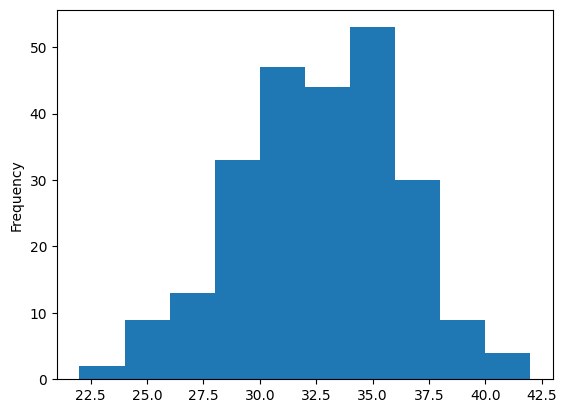

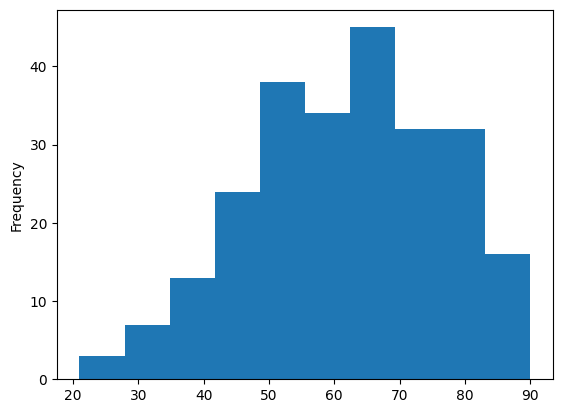

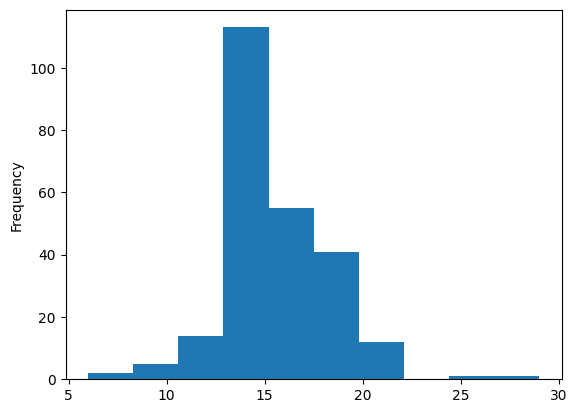

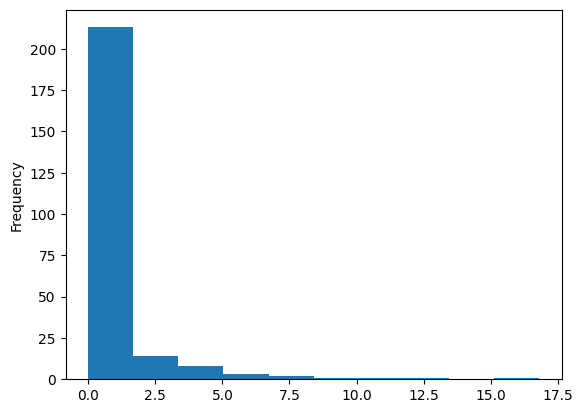

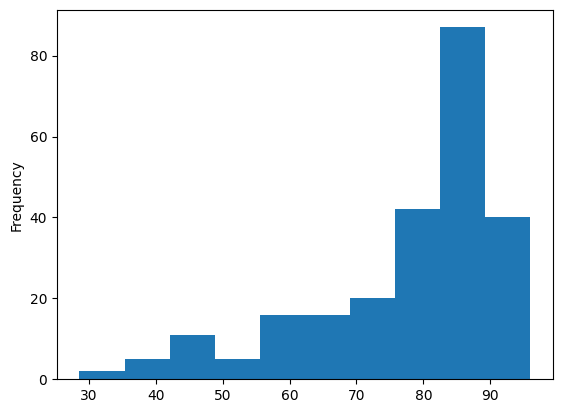

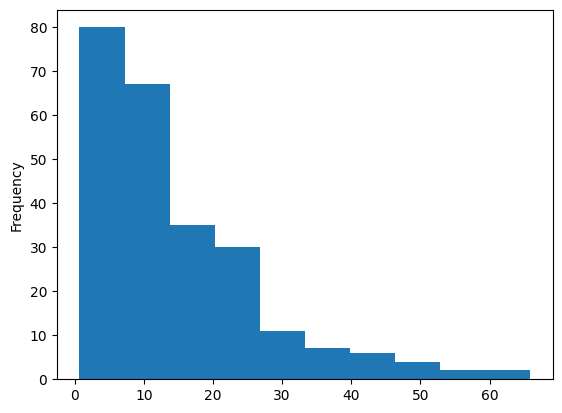

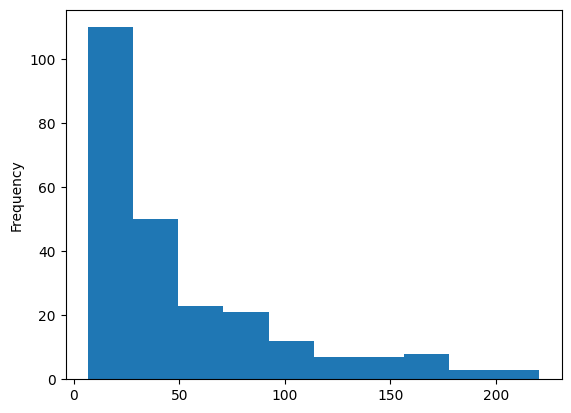

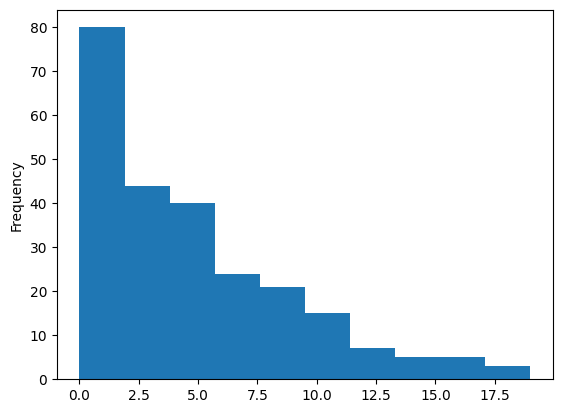

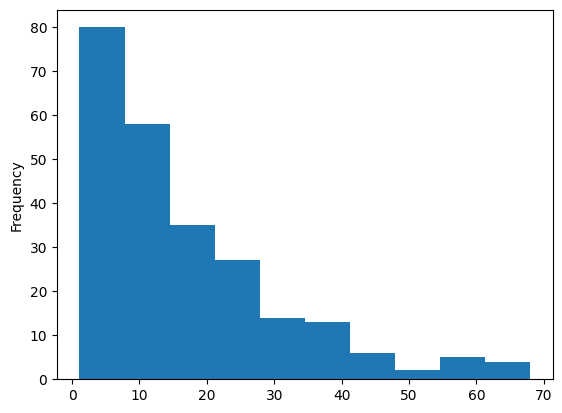

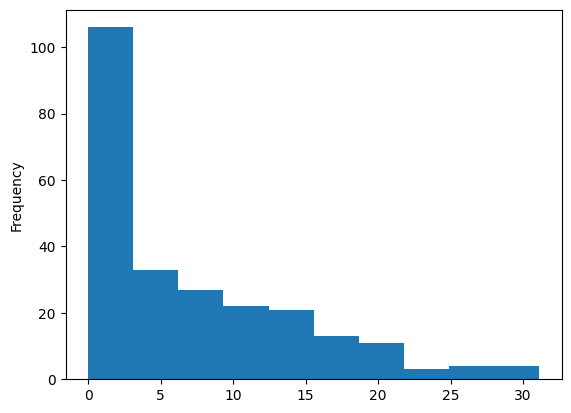

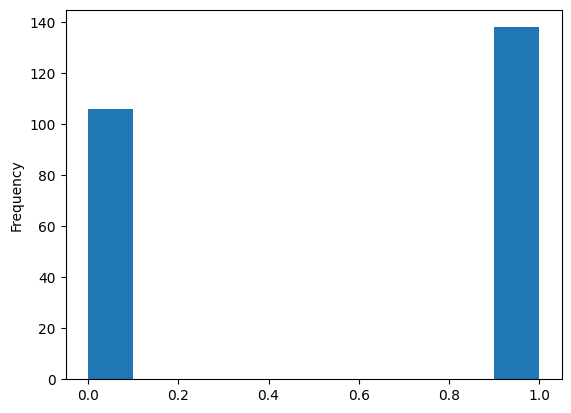

In [92]:

for col in filtered_df.columns:
    filtered_df[col].plot(kind='hist')
    plt.show()

In [94]:
filtered_df

Temperature    RH    Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI  isFire
0           29.0  57.0  18.0   0.0  65.7   3.4   7.6  1.3   3.4  0.5       0
1           29.0  61.0  13.0   1.3  64.4   4.1   7.6  1.0   3.9  0.4       0
2           26.0  82.0  22.0  13.1  47.1   2.5   7.1  0.3   2.7  0.1       0
3           25.0  89.0  13.0   2.5  28.6   1.3   6.9  0.0   1.7  0.0       0
4           27.0  77.0  16.0   0.0  64.8   3.0  14.2  1.2   3.9  0.5       0
..           ...   ...   ...   ...   ...   ...   ...  ...   ...  ...     ...
239         30.0  65.0  14.0   0.0  85.4  16.0  44.5  4.5  16.9  6.5       1
240         28.0  87.0  15.0   4.4  41.1   6.5   8.0  0.1   6.2  0.0       0
241         27.0  87.0  29.0   0.5  45.9   3.5   7.9  0.4   3.4  0.2       0
242         24.0  54.0  18.0   0.1  79.7   4.3  15.2  1.7   5.1  0.7       0
243         24.0  64.0  15.0   0.2  67.3   3.8  16.5  1.2   4.8  0.5       0

[244 rows x 11 columns]

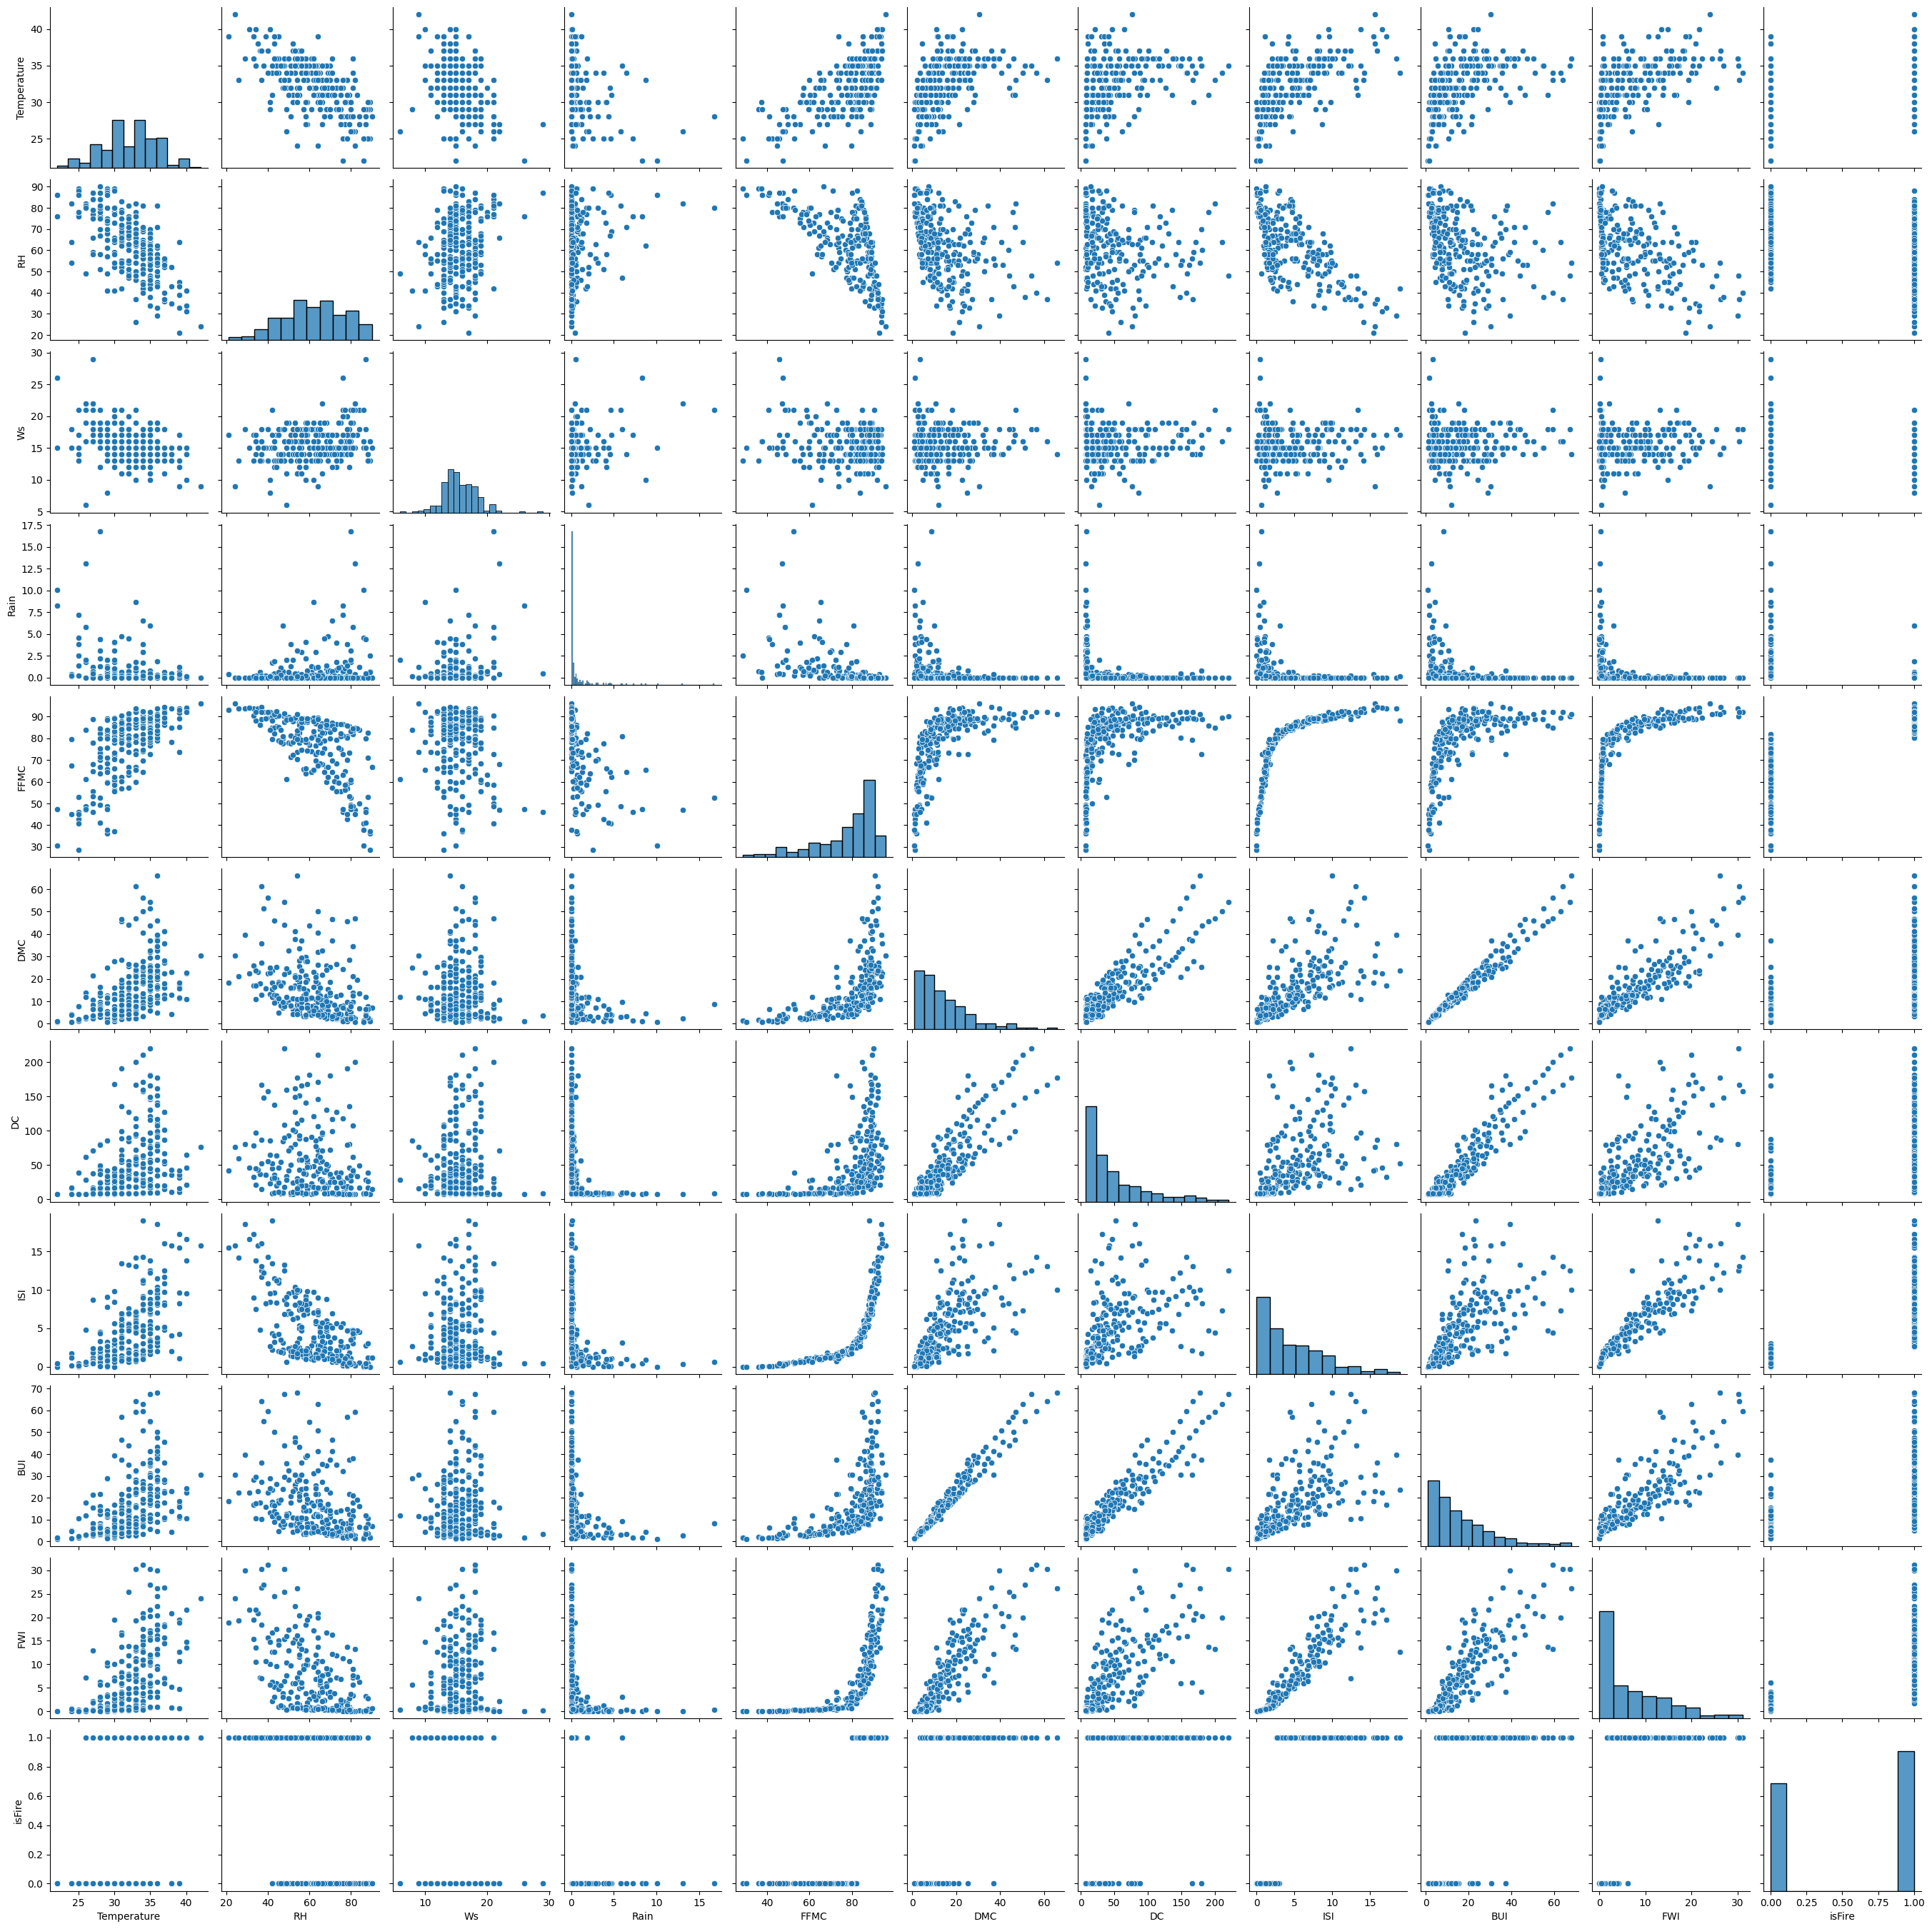

In [95]:
sns.pairplot(filtered_df)

In [96]:
filtered_df.corr()


Temperature        RH        Ws      Rain      FFMC       DMC  \
Temperature     1.000000 -0.654443 -0.278132 -0.326786  0.677491  0.483105   
RH             -0.654443  1.000000  0.236084  0.222968 -0.645658 -0.405133   
Ws             -0.278132  0.236084  1.000000  0.170169 -0.163255 -0.001246   
Rain           -0.326786  0.222968  0.170169  1.000000 -0.544045 -0.288548   
FFMC            0.677491 -0.645658 -0.163255 -0.544045  1.000000  0.602391   
DMC             0.483105 -0.405133 -0.001246 -0.288548  0.602391  1.000000   
DC              0.370511 -0.220344  0.076253 -0.296808  0.503919  0.875362   
ISI             0.607551 -0.690637  0.015248 -0.347105  0.739730  0.674499   
BUI             0.455504 -0.348587  0.029756 -0.299171  0.589652  0.982073   
FWI             0.564599 -0.577577  0.032315 -0.324369  0.690289  0.875827   
isFire          0.518119 -0.435023 -0.066529 -0.379449  0.770114  0.584188   

                   DC       ISI       BUI       FWI    isFire  
Temperature  0.370511  0.607551  0.455504  0.564599  0.518119  
RH          -0.220344 -0.690637 -0.348587 -0.577577 -0.435023  
Ws           0.076253  0.015248  0.029756  0.032315 -0.066529  
Rain        -0.296808 -0.347105 -0.299171 -0.324369 -0.379449  
FFMC         0.503919  0.739730  0.589652  0.690289  0.770114  
DMC          0.875362  0.674499  0.982073  0.875827  0.584188  
DC           1.000000  0.498926  0.941906  0.738714  0.507132  
ISI          0.498926  1.000000  0.635891  0.916343  0.735511  
BUI          0.941906  0.635891  1.000000  0.857628  0.583882  
FWI          0.738714  0.916343  0.857628  1.000000  0.718079  
isFire       0.507132  0.735511  0.583882  0.718079  1.000000

In [97]:
filtered_df.cov()

Temperature          RH         Ws       Rain        FFMC  \
Temperature    13.204817  -35.396782  -2.840215  -2.374270   35.297598   
RH            -35.396782  221.539415   9.874739   6.635431 -137.785533   
Ws             -2.840215    9.874739   7.897102   0.956129   -6.577727   
Rain           -2.374270    6.635431   0.956129   3.997623  -15.595918   
FFMC           35.297598 -137.785533  -6.577727 -15.595918  205.565939   
DMC            21.712423  -74.580245  -0.043306  -7.135415  106.820535   
DC             64.113719 -156.174991  10.204060 -28.259196  344.048788   
ISI             9.218043  -42.920524   0.178913  -2.897687   44.283138   
BUI            23.512265  -73.700941   1.187799  -8.496825  120.090018   
FWI            15.234117  -63.833144   0.674293  -4.815603   73.488130   
isFire          0.935168   -3.216117  -0.092862  -0.376833    5.484349   

                    DMC           DC        ISI         BUI         FWI  \
Temperature   21.712423    64.113719   9.218043   23.512265   15.234117   
RH           -74.580245  -156.174991 -42.920524  -73.700941  -63.833144   
Ws            -0.043306    10.204060   0.178913    1.187799    0.674293   
Rain          -7.135415   -28.259196  -2.897687   -8.496825   -4.815603   
FFMC         106.820535   344.048788  44.283138  120.090018   73.488130   
DMC          152.968382   515.551947  34.831449  172.536341   80.432166   
DC           515.551947  2267.606583  99.199508  637.129111  261.198414   
ISI           34.831449    99.199508  17.433281   37.714477   28.409158   
BUI          172.536341   637.129111  37.714477  201.777024   90.457701   
FWI           80.432166   261.198414  28.409158   90.457701   55.134221   
isFire         3.588791    11.994976   1.525363    4.119605    2.648360   

                isFire  
Temperature   0.935168  
RH           -3.216117  
Ws           -0.092862  
Rain         -0.376833  
FFMC          5.484349  
DMC           3.588791  
DC           11.994976  
ISI           1.525363  
BUI           4.119605  
FWI           2.648360  
isFire        0.246711

In [98]:
for xy,z in filtered_df.corr().items():
    display(xy,z)

'Temperature'

Temperature    1.000000
RH            -0.654443
Ws            -0.278132
Rain          -0.326786
FFMC           0.677491
DMC            0.483105
DC             0.370511
ISI            0.607551
BUI            0.455504
FWI            0.564599
isFire         0.518119
Name: Temperature, dtype: float64

'RH'

Temperature   -0.654443
RH             1.000000
Ws             0.236084
Rain           0.222968
FFMC          -0.645658
DMC           -0.405133
DC            -0.220344
ISI           -0.690637
BUI           -0.348587
FWI           -0.577577
isFire        -0.435023
Name: RH, dtype: float64

'Ws'

Temperature   -0.278132
RH             0.236084
Ws             1.000000
Rain           0.170169
FFMC          -0.163255
DMC           -0.001246
DC             0.076253
ISI            0.015248
BUI            0.029756
FWI            0.032315
isFire        -0.066529
Name: Ws, dtype: float64

'Rain'

Temperature   -0.326786
RH             0.222968
Ws             0.170169
Rain           1.000000
FFMC          -0.544045
DMC           -0.288548
DC            -0.296808
ISI           -0.347105
BUI           -0.299171
FWI           -0.324369
isFire        -0.379449
Name: Rain, dtype: float64

'FFMC'

Temperature    0.677491
RH            -0.645658
Ws            -0.163255
Rain          -0.544045
FFMC           1.000000
DMC            0.602391
DC             0.503919
ISI            0.739730
BUI            0.589652
FWI            0.690289
isFire         0.770114
Name: FFMC, dtype: float64

'DMC'

Temperature    0.483105
RH            -0.405133
Ws            -0.001246
Rain          -0.288548
FFMC           0.602391
DMC            1.000000
DC             0.875362
ISI            0.674499
BUI            0.982073
FWI            0.875827
isFire         0.584188
Name: DMC, dtype: float64

'DC'

Temperature    0.370511
RH            -0.220344
Ws             0.076253
Rain          -0.296808
FFMC           0.503919
DMC            0.875362
DC             1.000000
ISI            0.498926
BUI            0.941906
FWI            0.738714
isFire         0.507132
Name: DC, dtype: float64

'ISI'

Temperature    0.607551
RH            -0.690637
Ws             0.015248
Rain          -0.347105
FFMC           0.739730
DMC            0.674499
DC             0.498926
ISI            1.000000
BUI            0.635891
FWI            0.916343
isFire         0.735511
Name: ISI, dtype: float64

'BUI'

Temperature    0.455504
RH            -0.348587
Ws             0.029756
Rain          -0.299171
FFMC           0.589652
DMC            0.982073
DC             0.941906
ISI            0.635891
BUI            1.000000
FWI            0.857628
isFire         0.583882
Name: BUI, dtype: float64

'FWI'

Temperature    0.564599
RH            -0.577577
Ws             0.032315
Rain          -0.324369
FFMC           0.690289
DMC            0.875827
DC             0.738714
ISI            0.916343
BUI            0.857628
FWI            1.000000
isFire         0.718079
Name: FWI, dtype: float64

'isFire'

Temperature    0.518119
RH            -0.435023
Ws            -0.066529
Rain          -0.379449
FFMC           0.770114
DMC            0.584188
DC             0.507132
ISI            0.735511
BUI            0.583882
FWI            0.718079
isFire         1.000000
Name: isFire, dtype: float64

# Machine learning model building

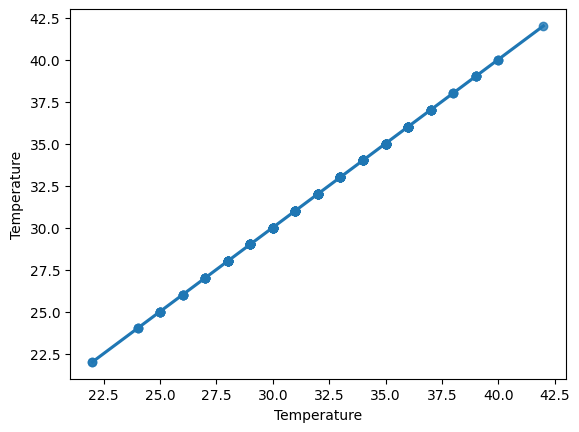

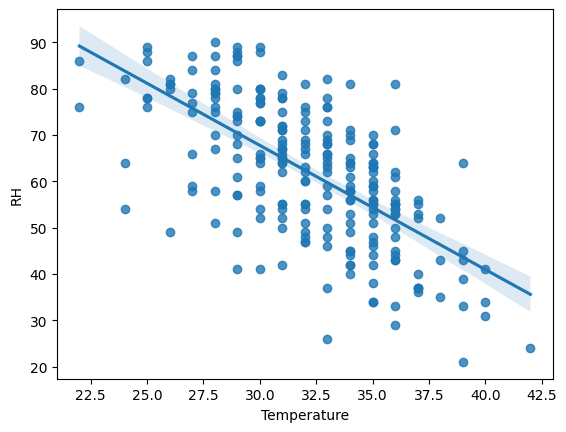

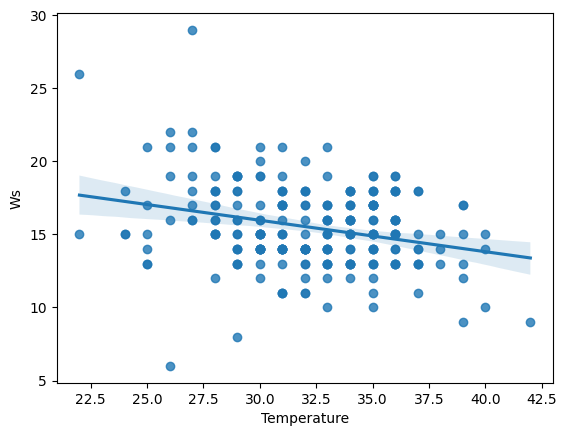

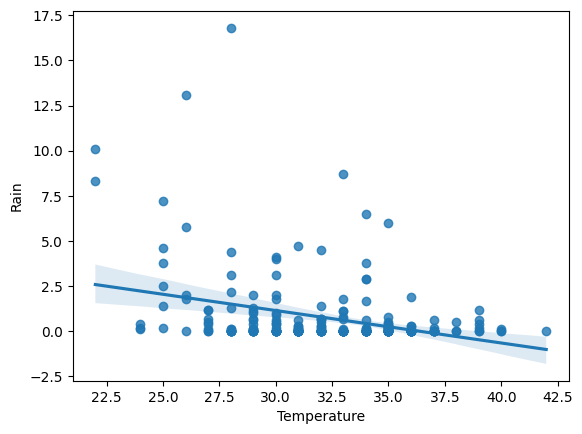

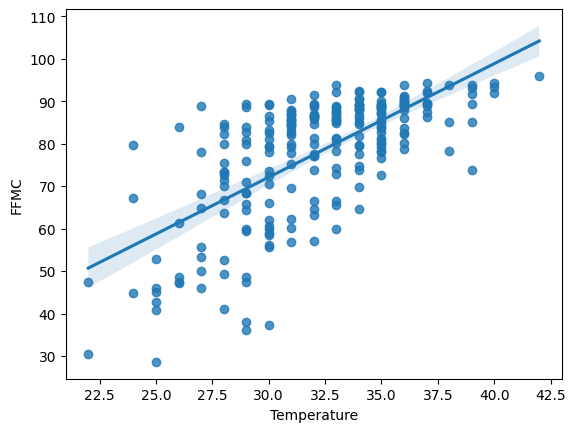

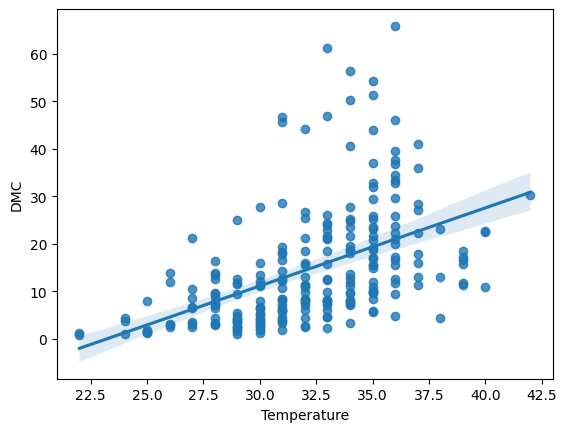

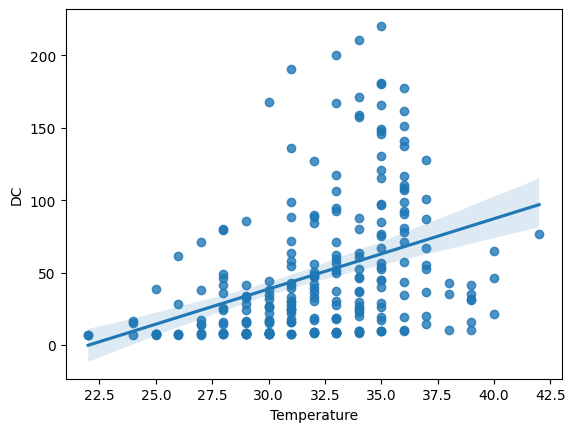

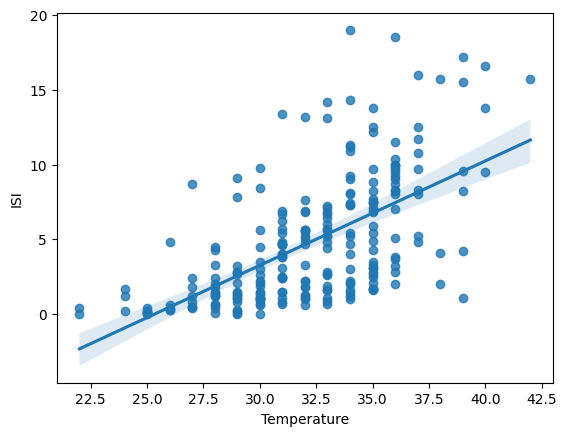

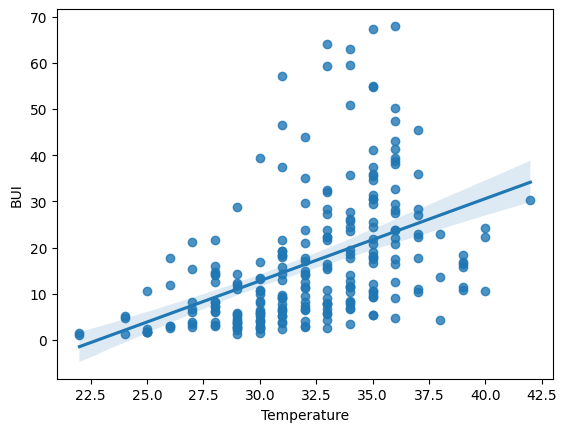

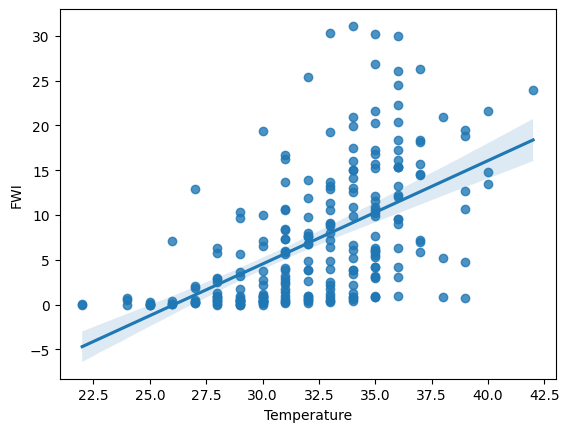

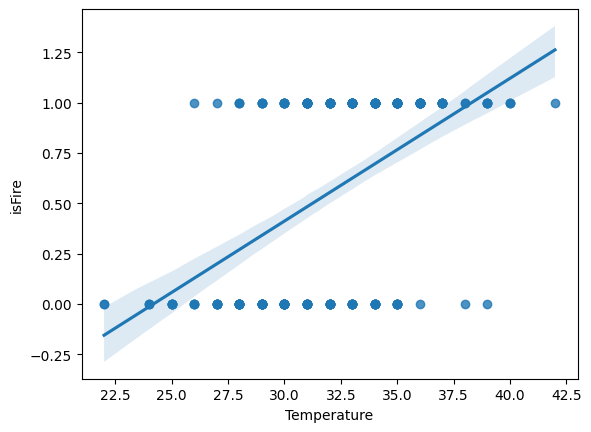

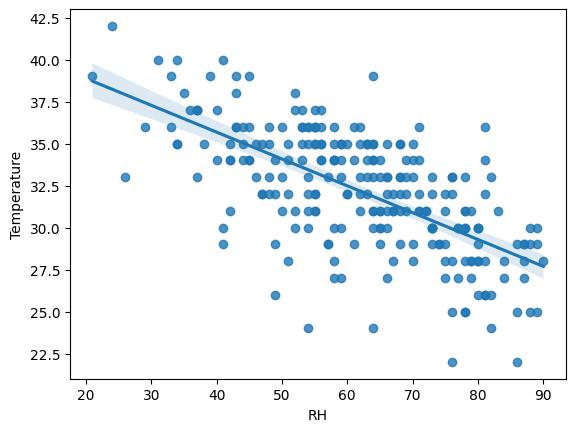

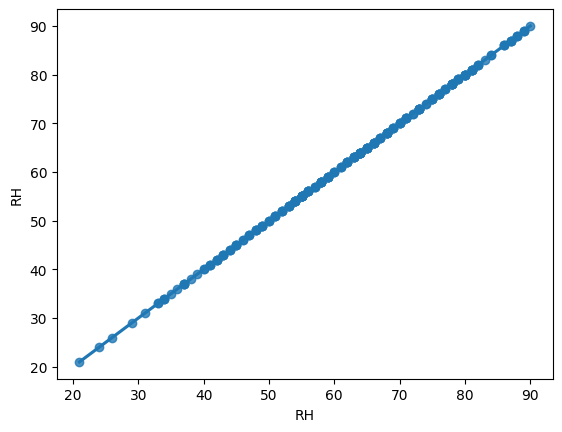

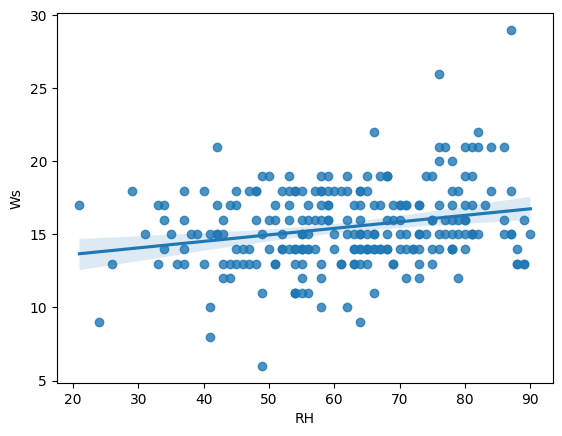

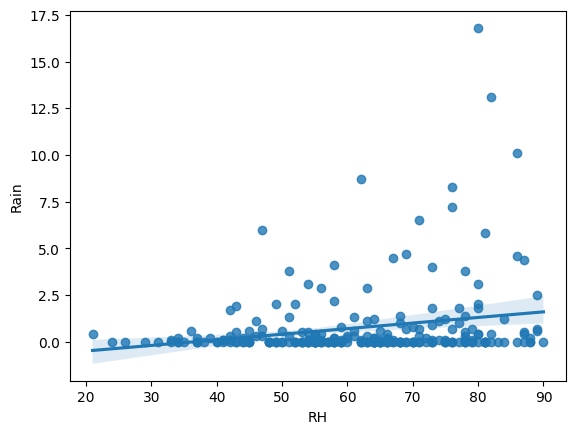

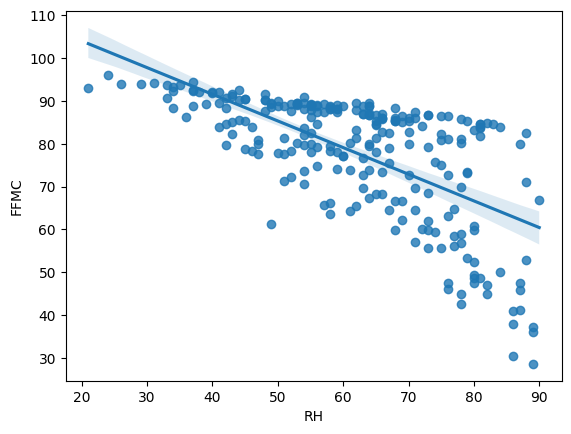

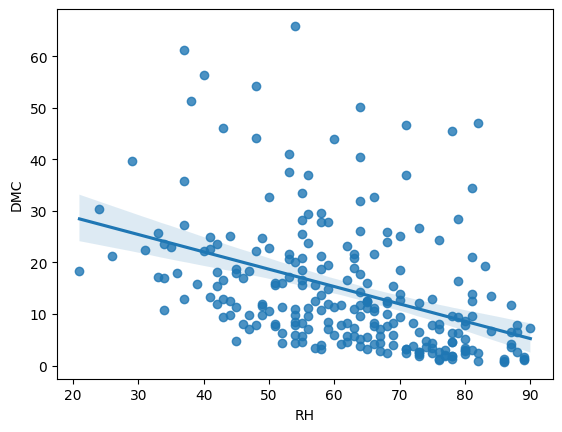

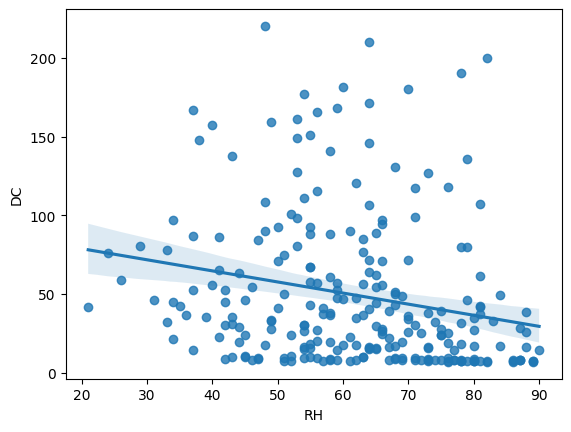

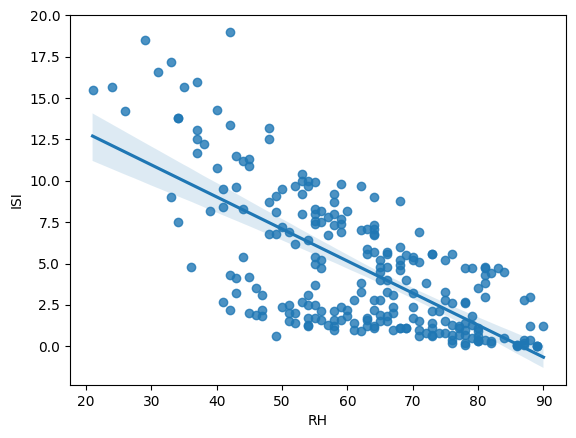

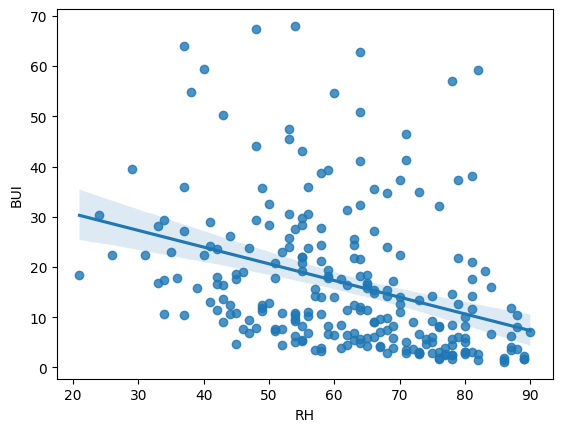

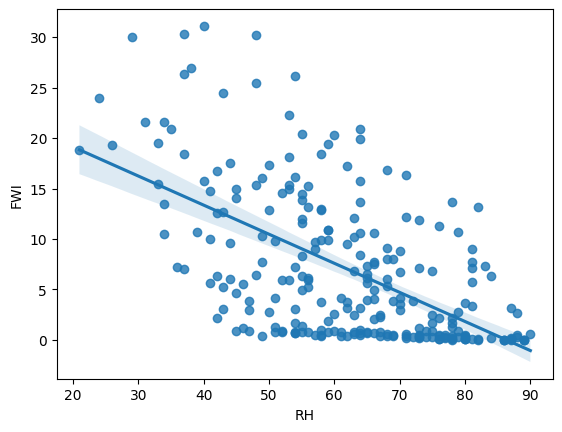

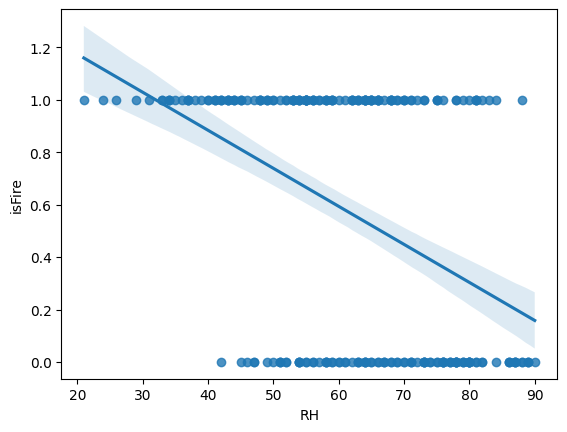

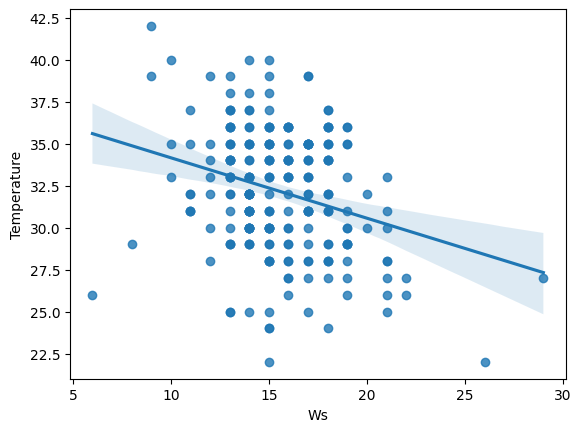

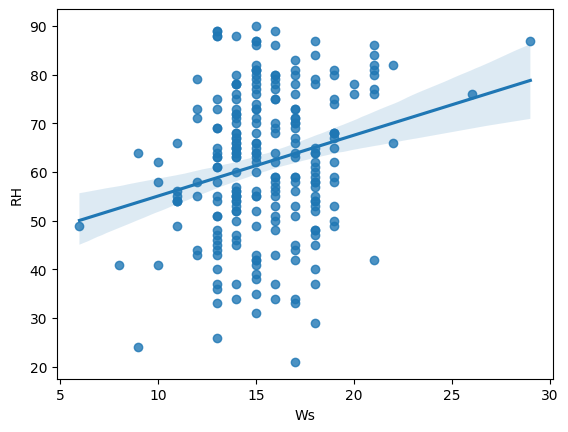

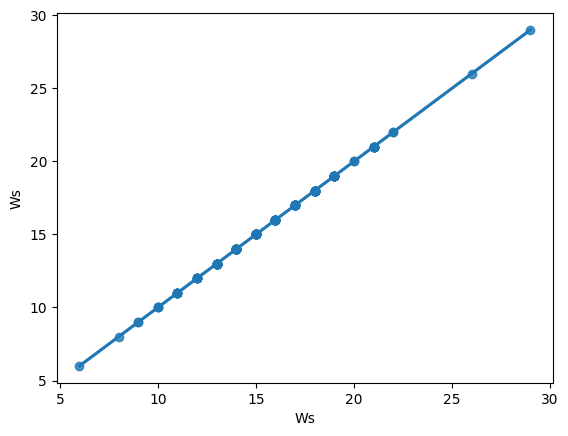

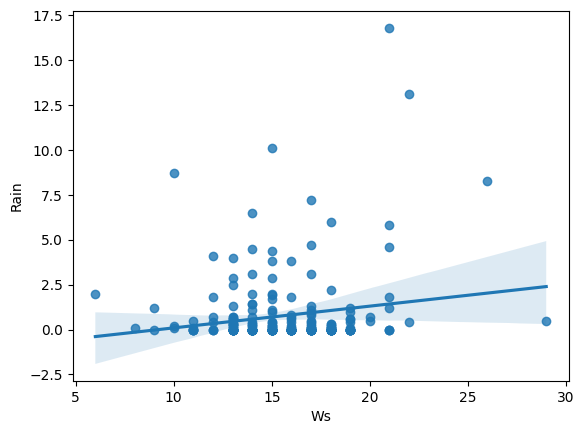

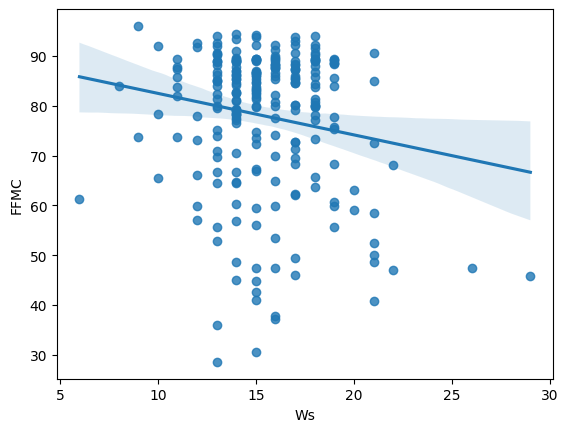

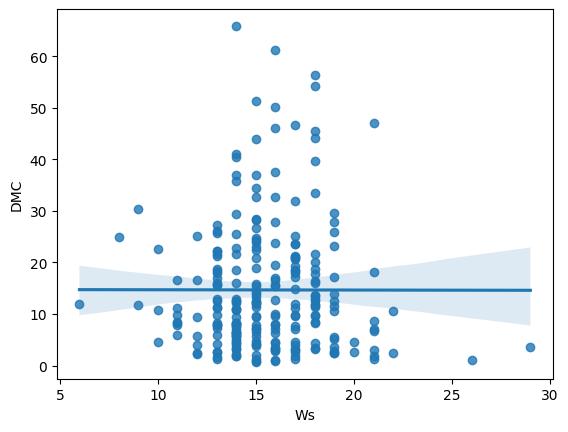

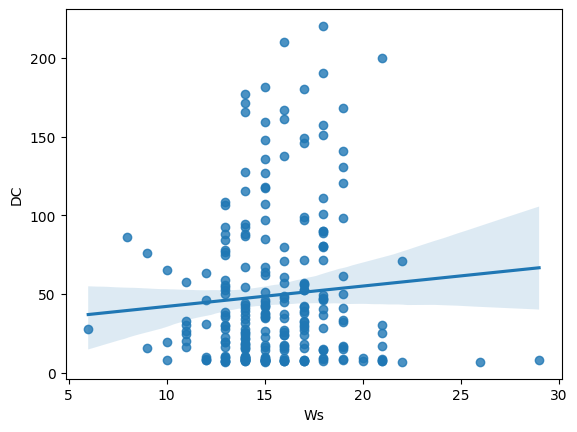

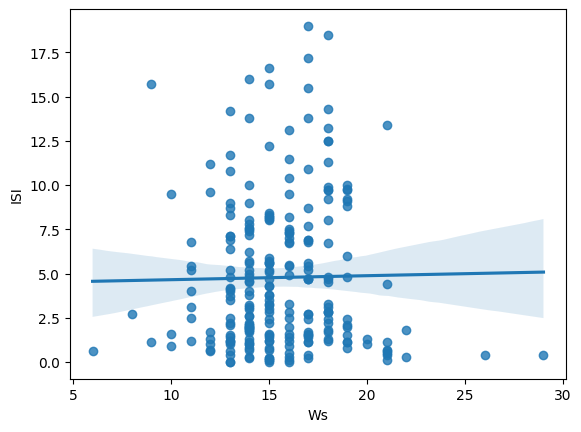

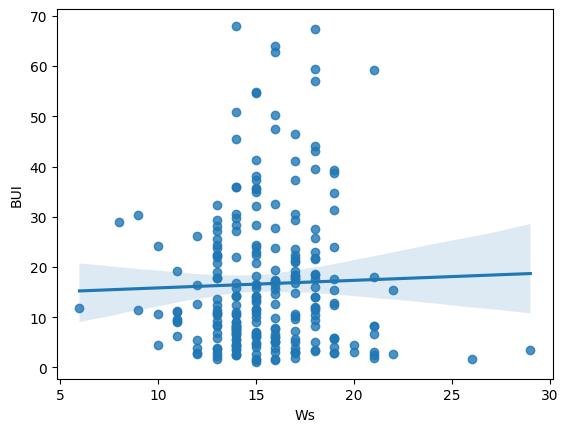

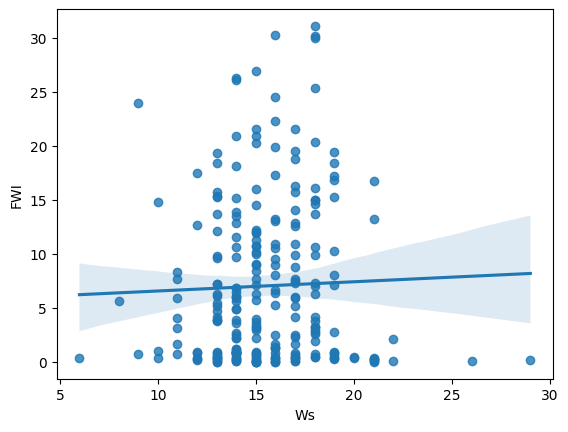

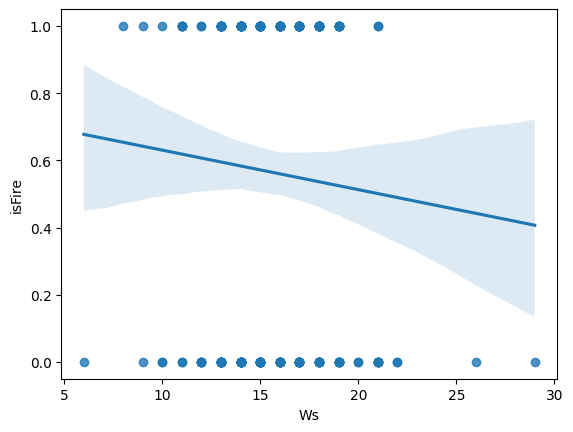

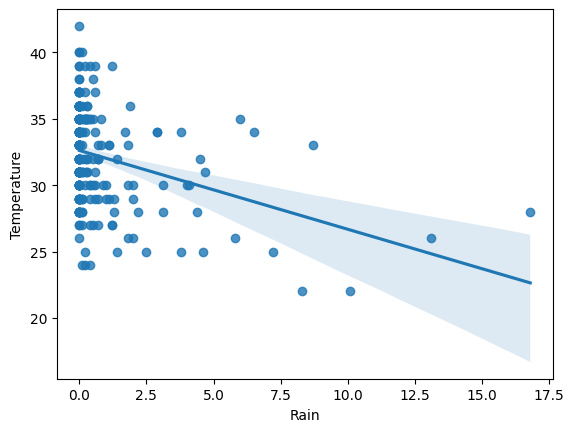

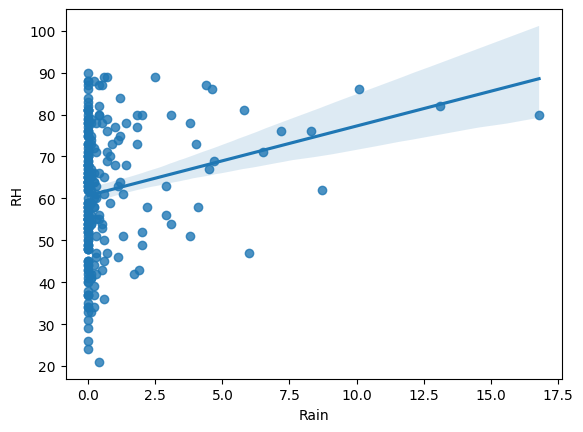

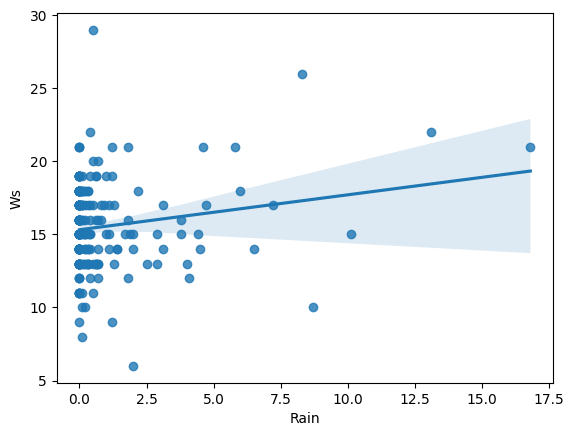

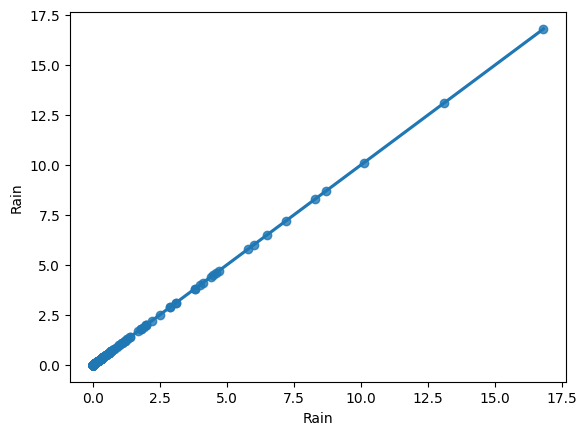

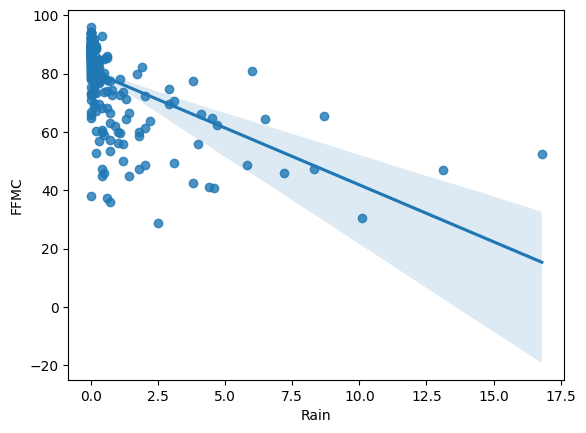

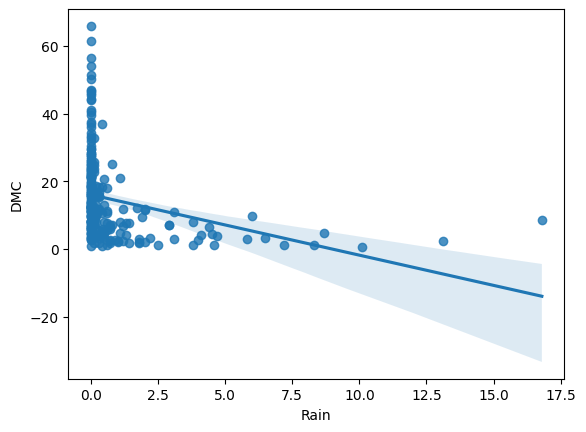

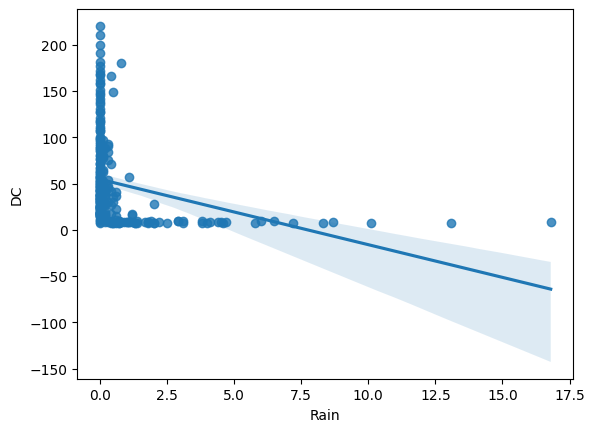

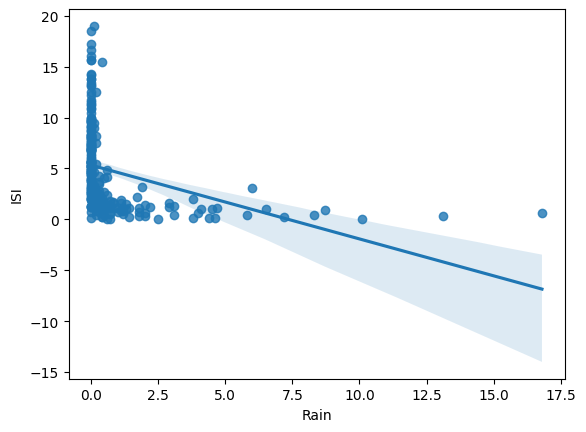

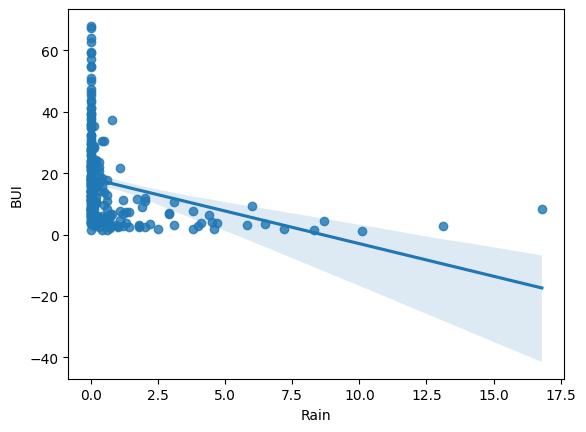

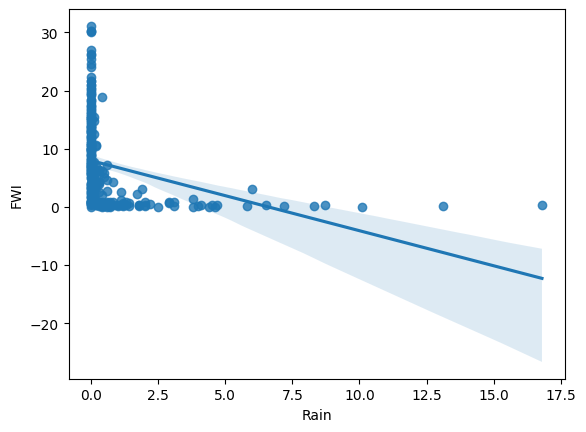

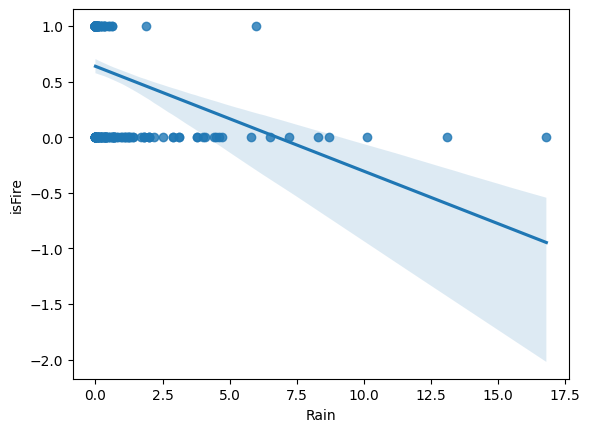

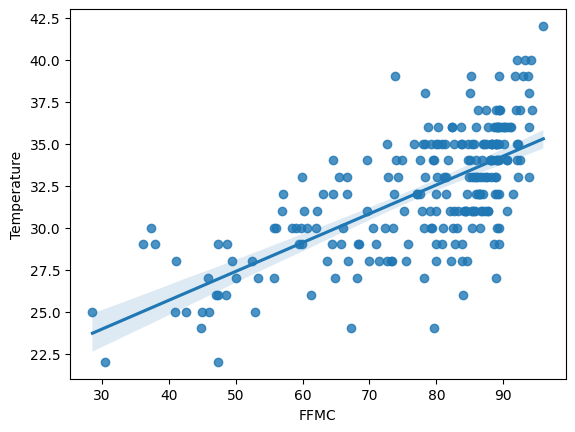

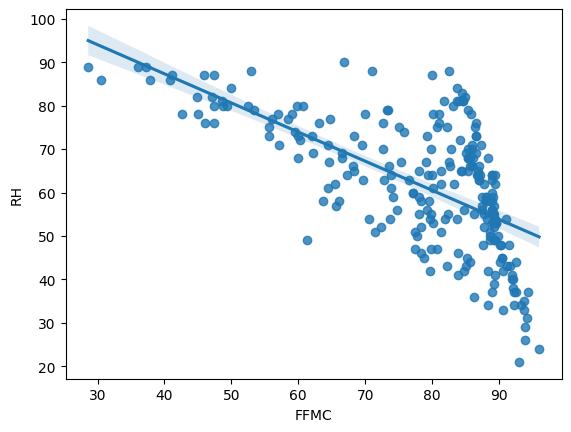

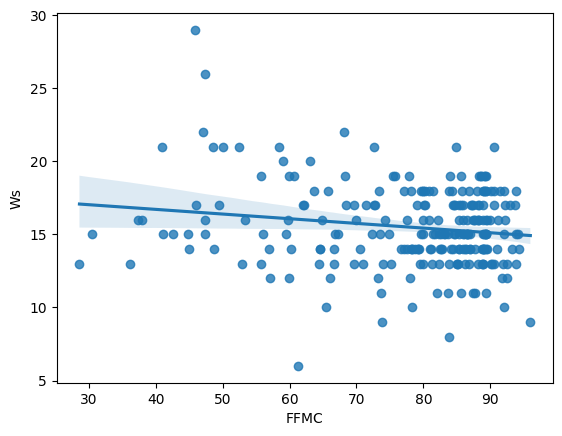

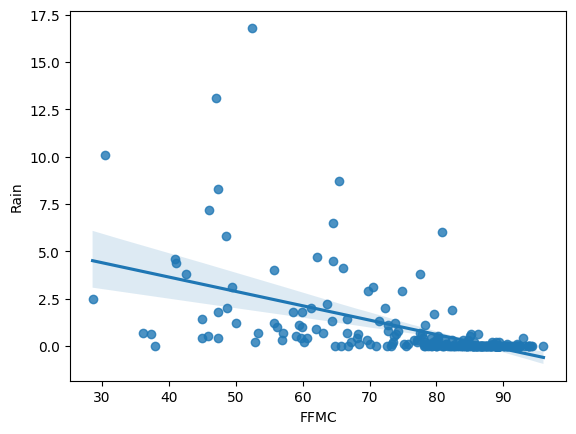

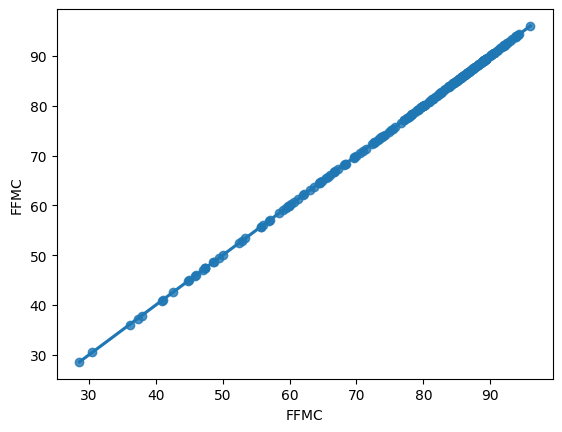

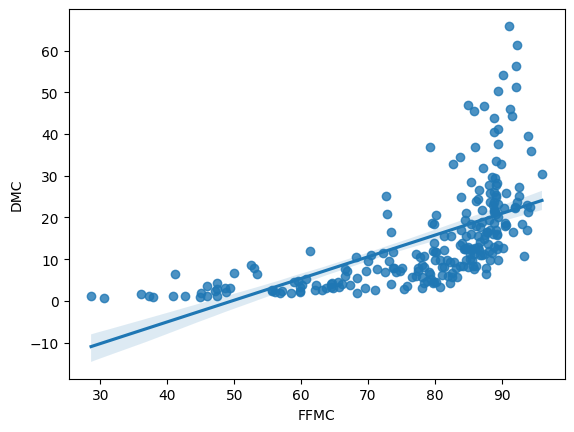

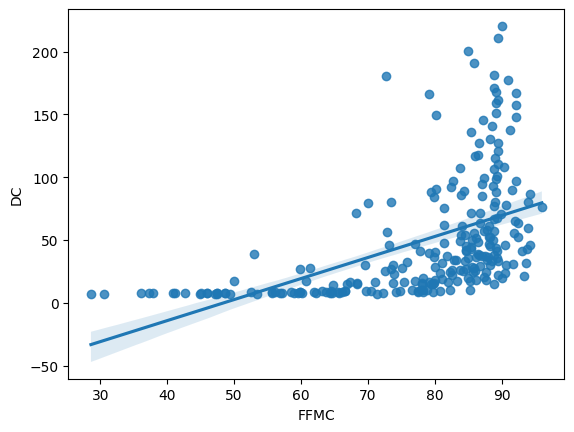

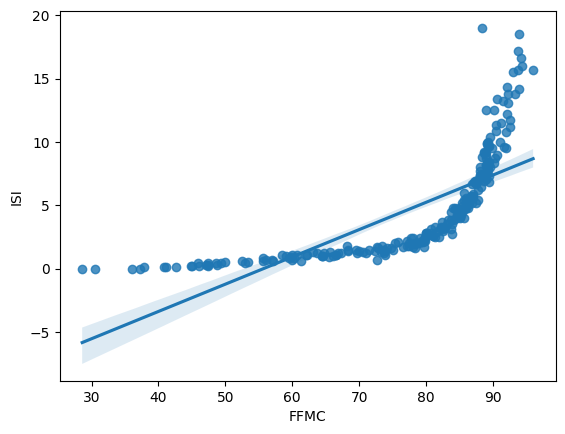

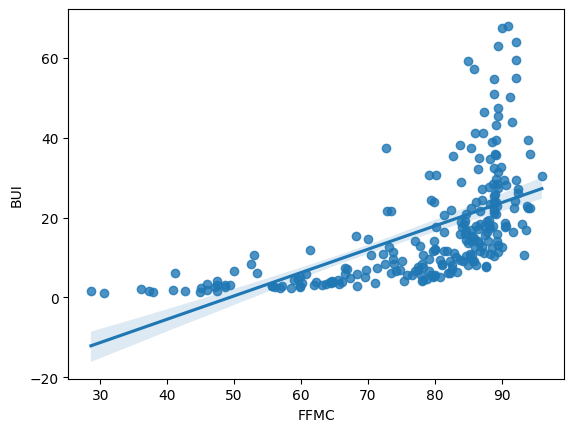

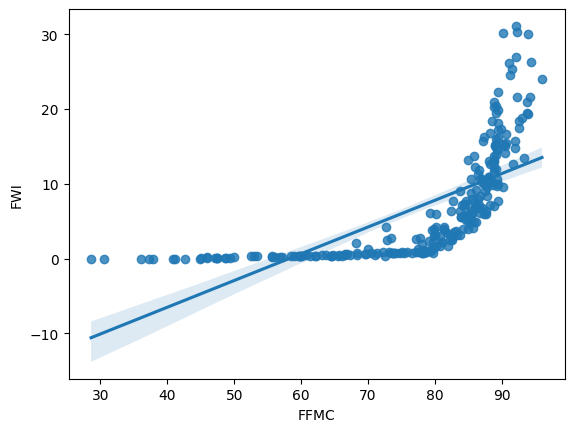

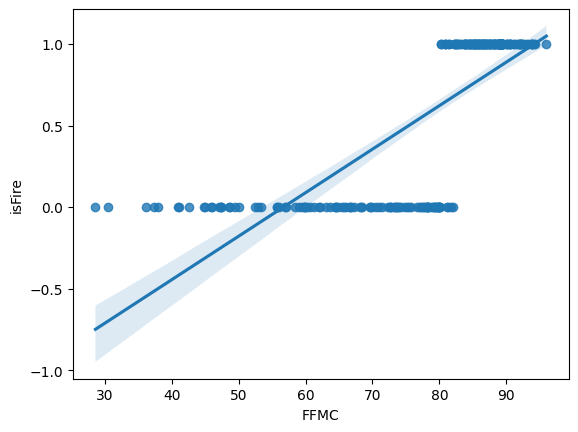

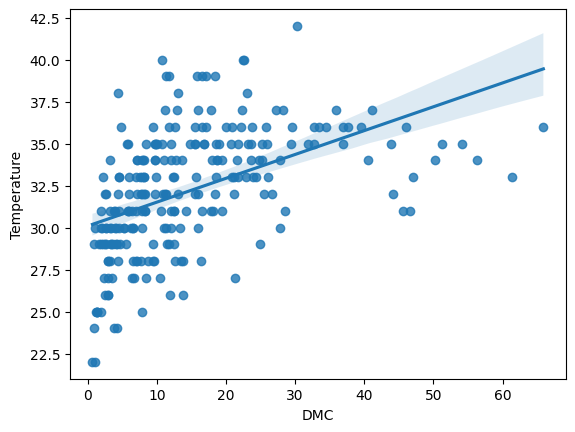

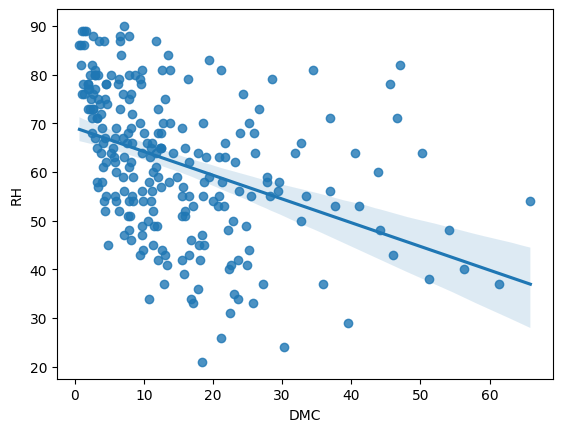

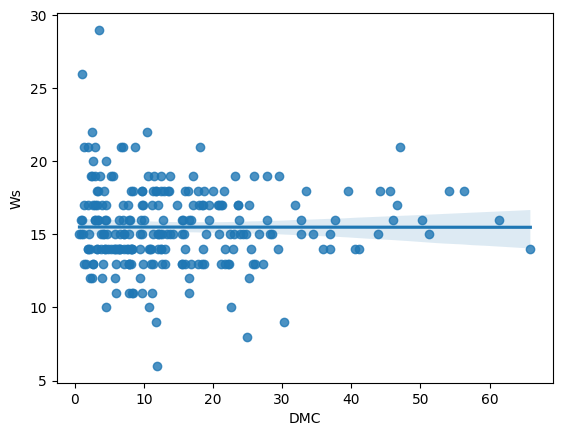

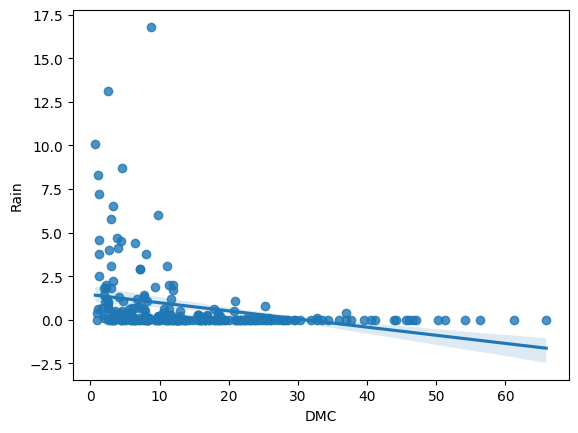

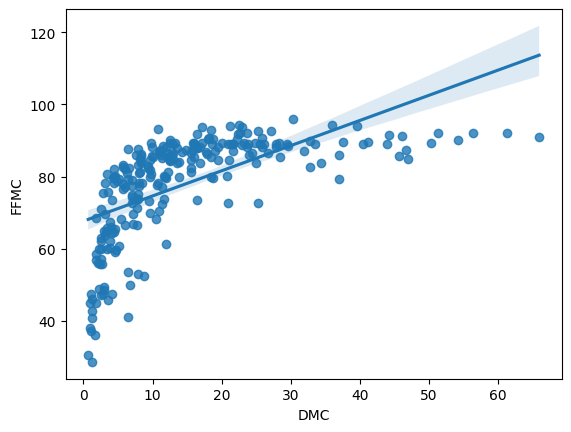

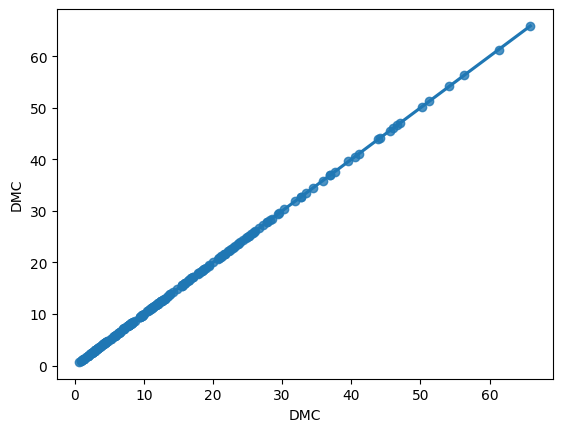

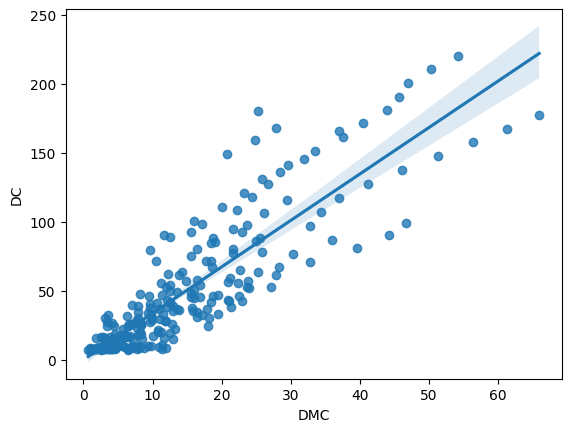

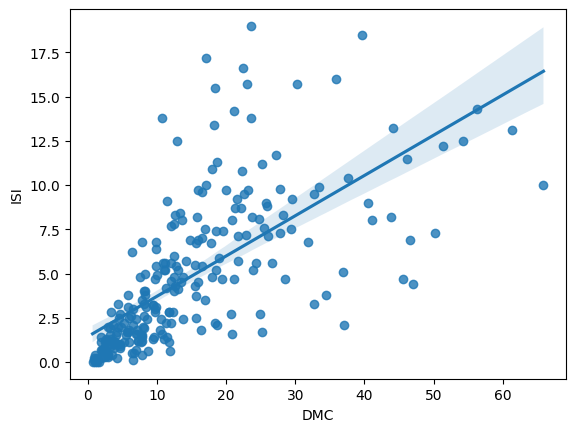

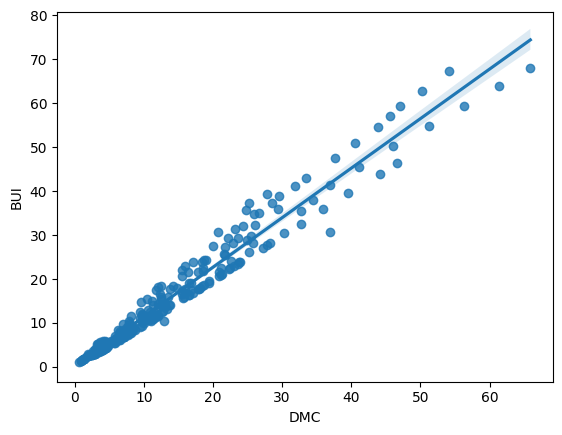

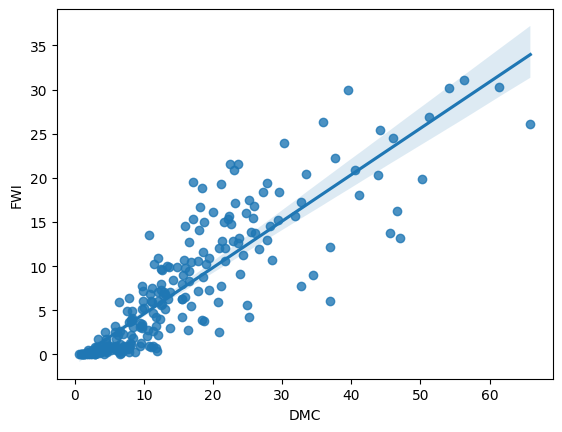

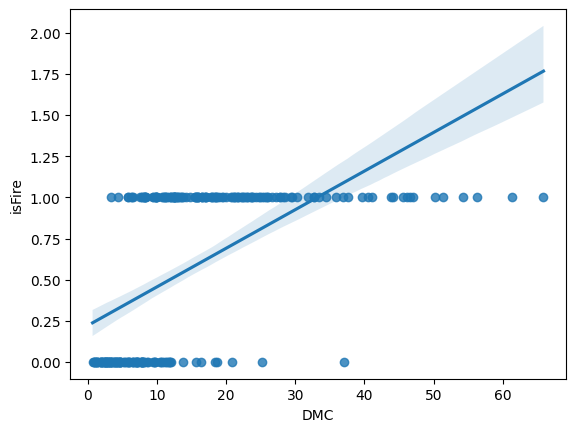

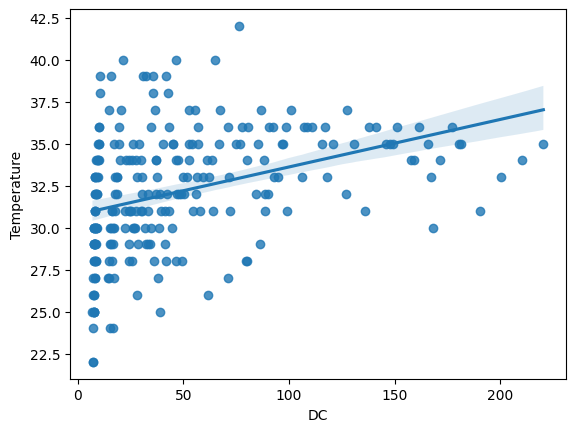

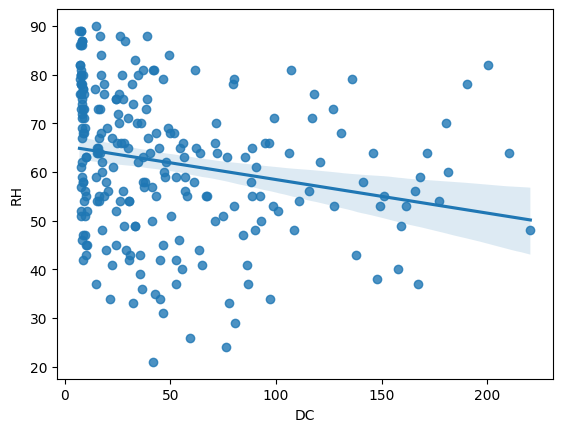

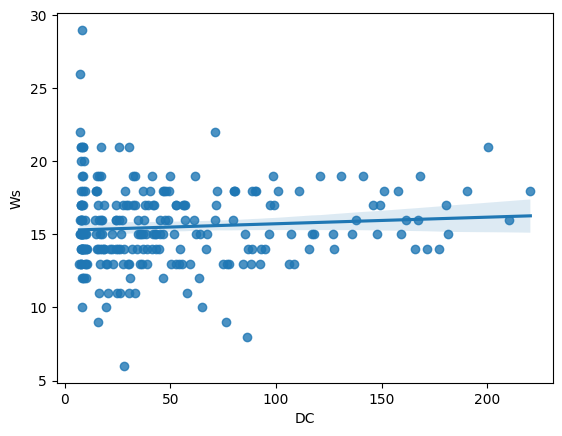

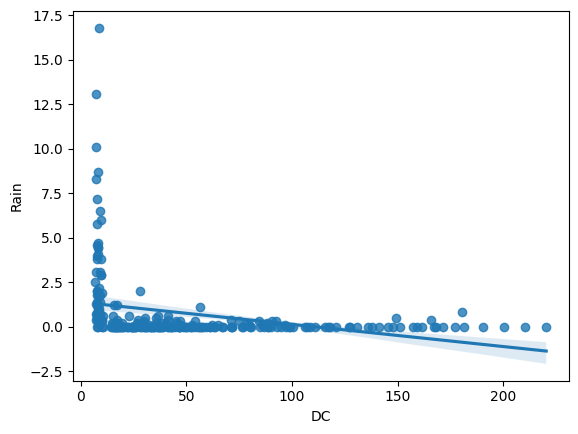

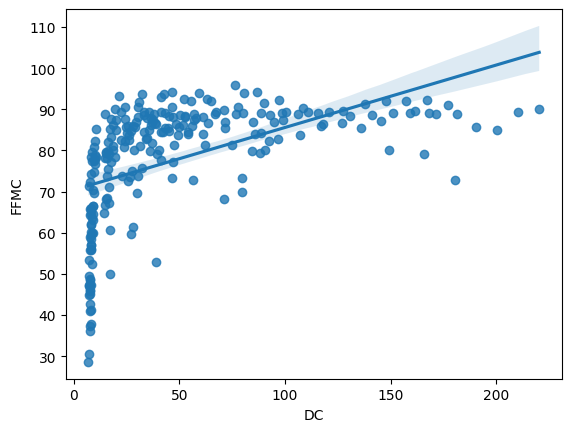

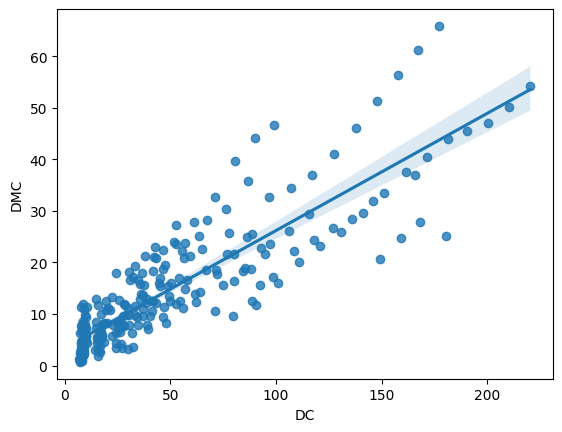

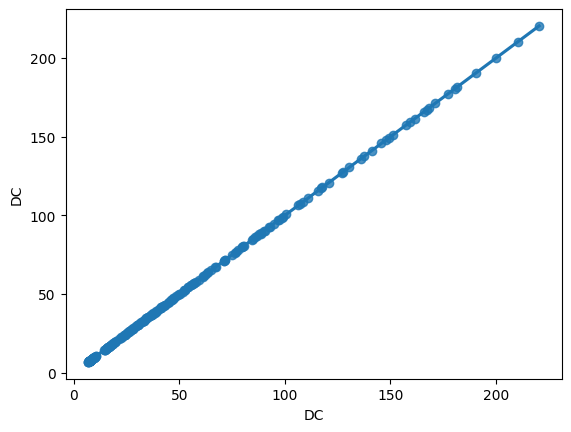

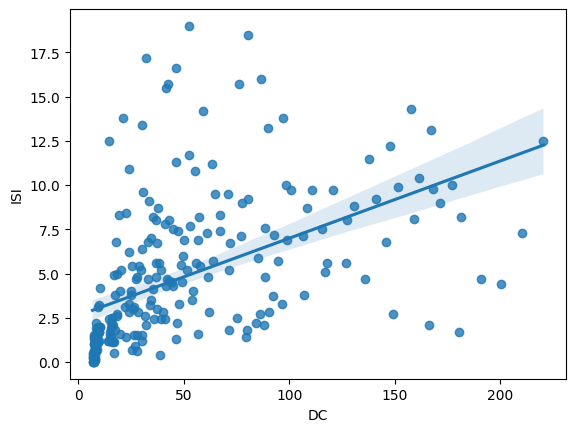

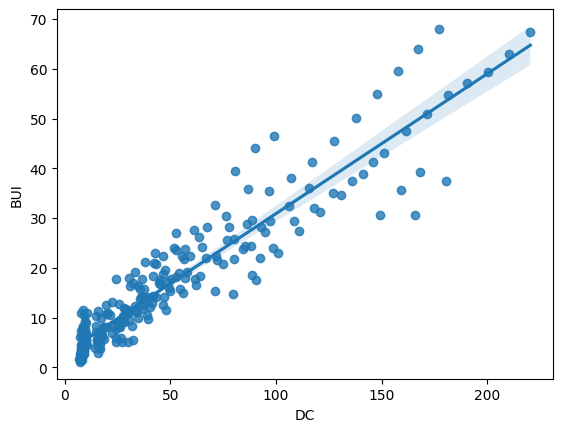

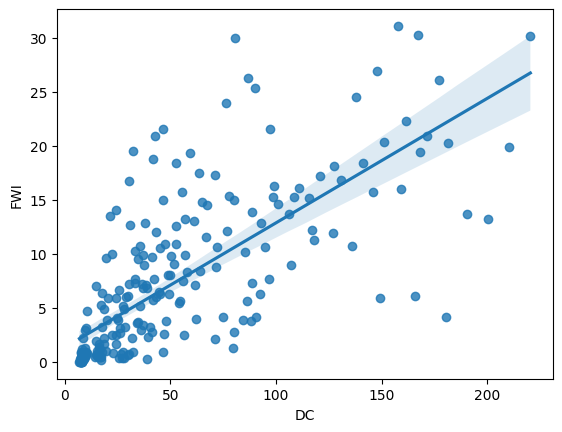

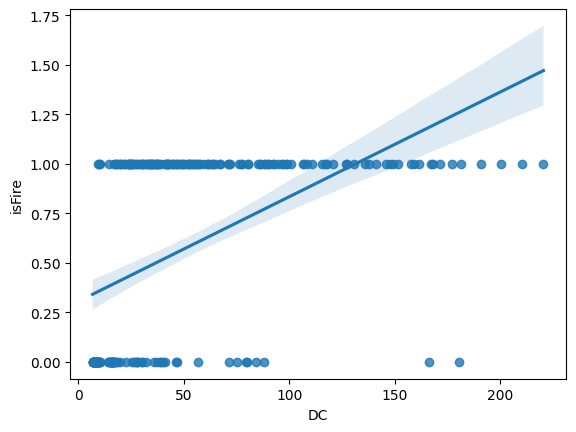

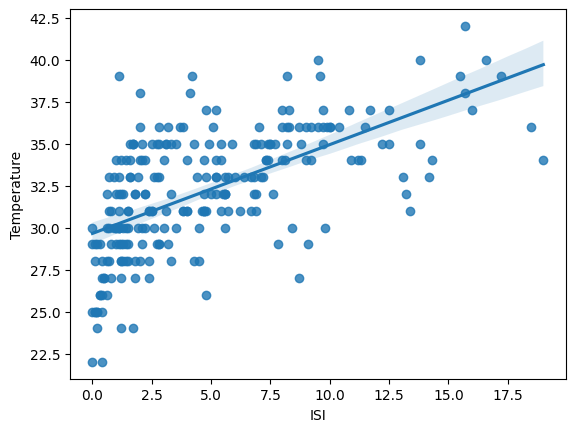

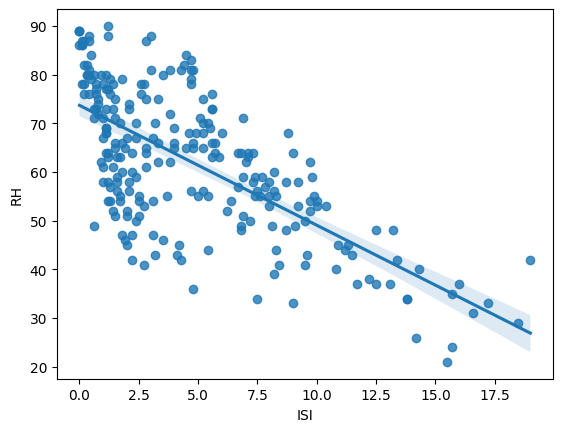

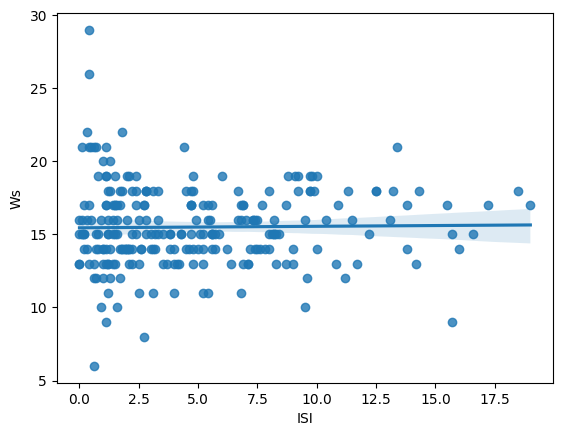

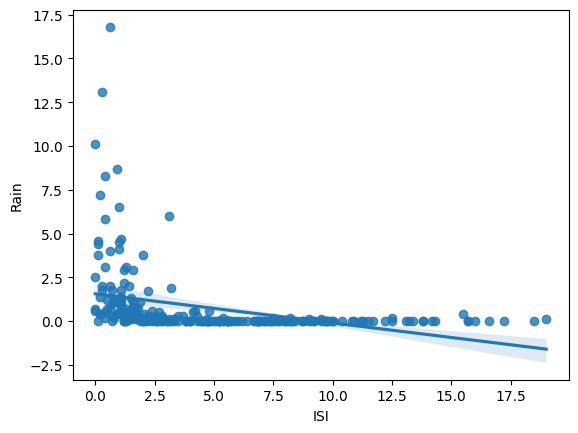

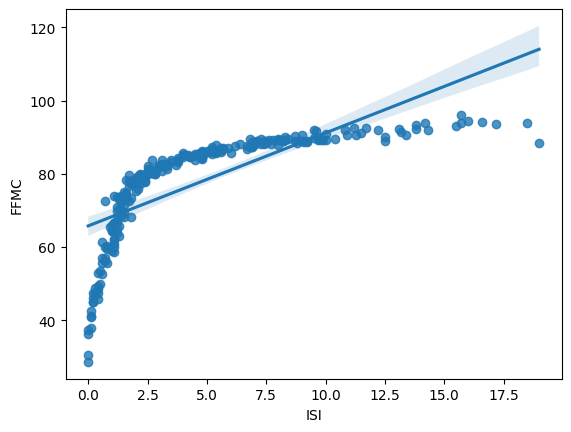

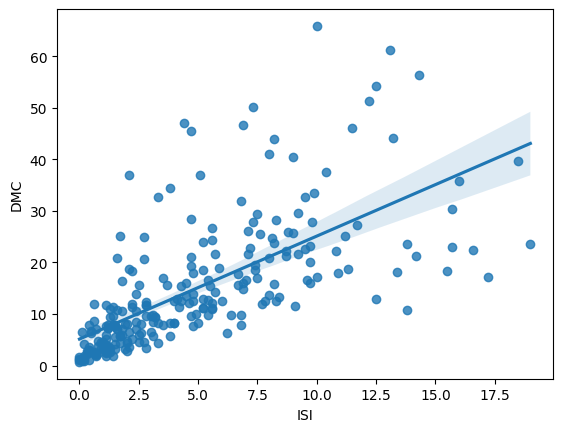

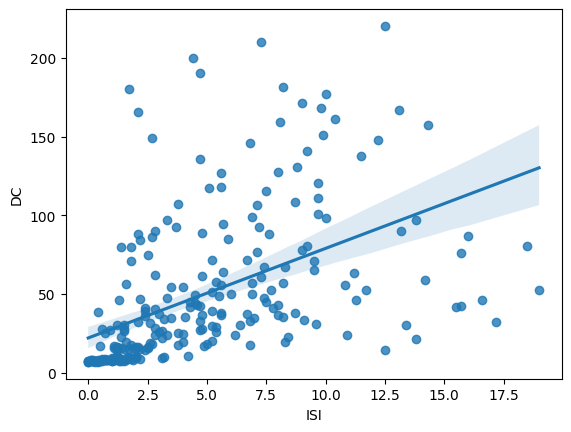

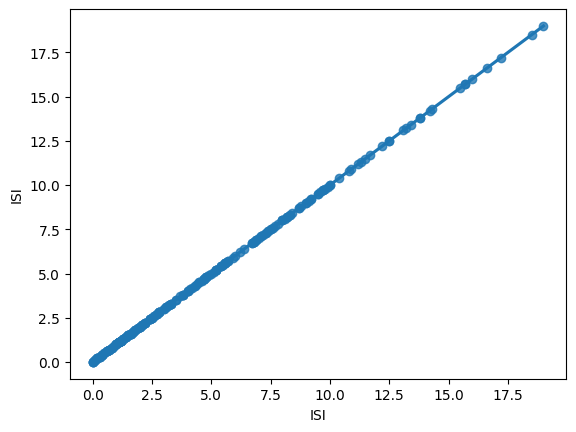

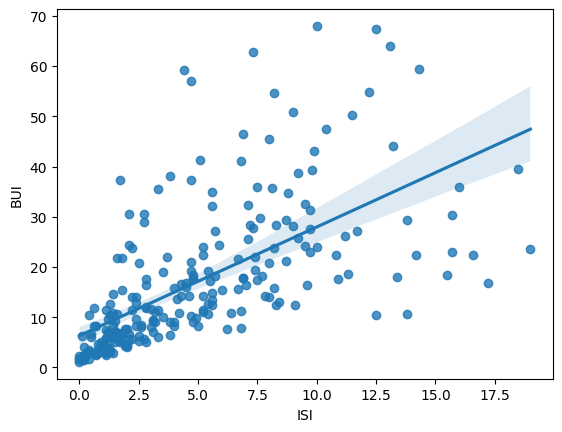

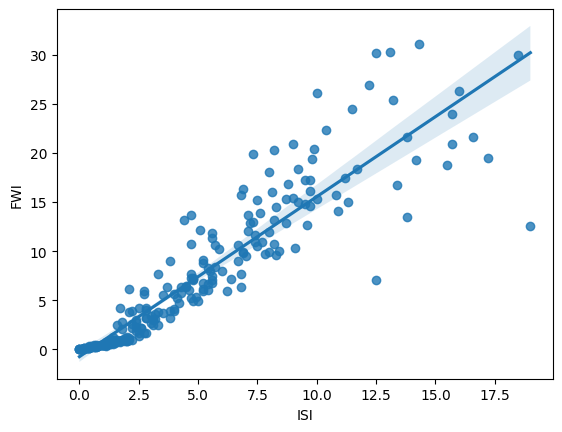

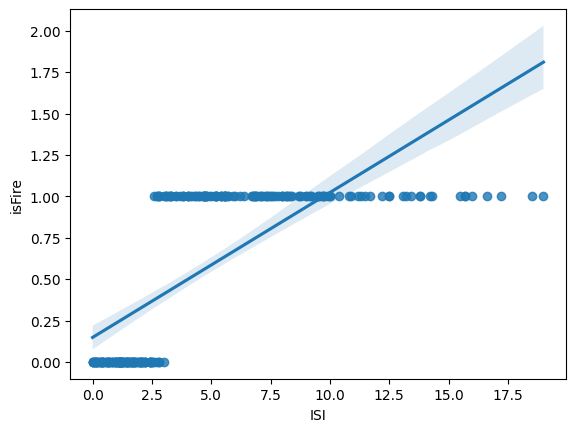

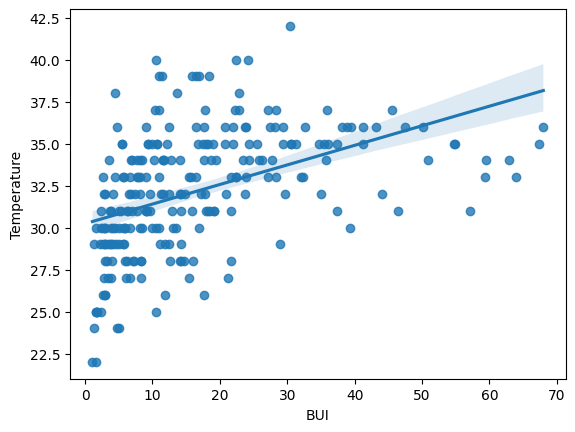

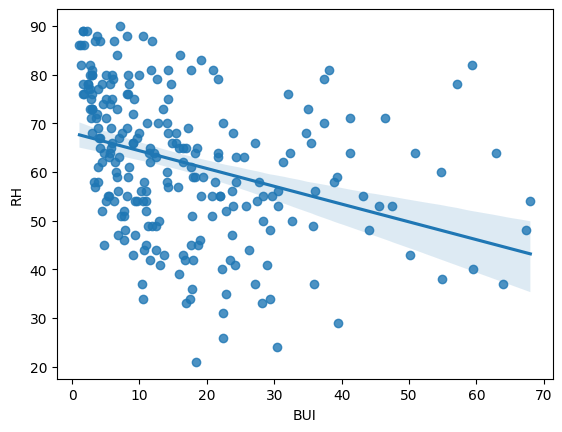

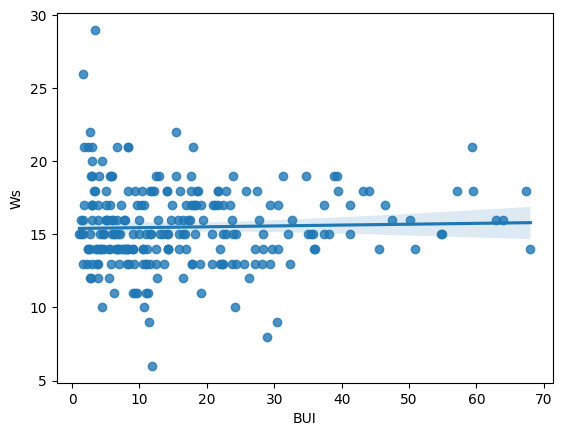

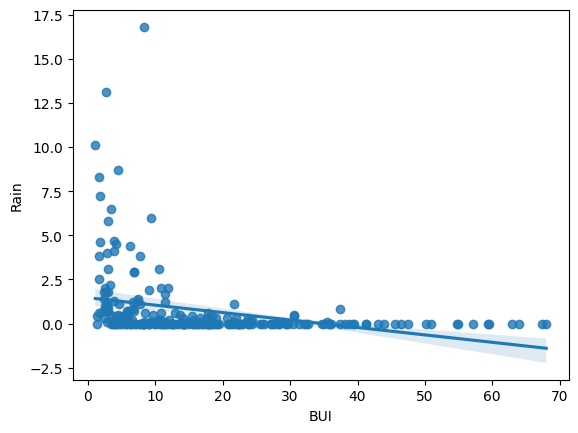

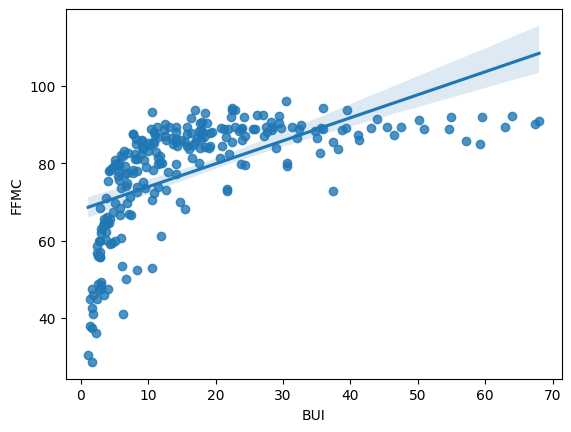

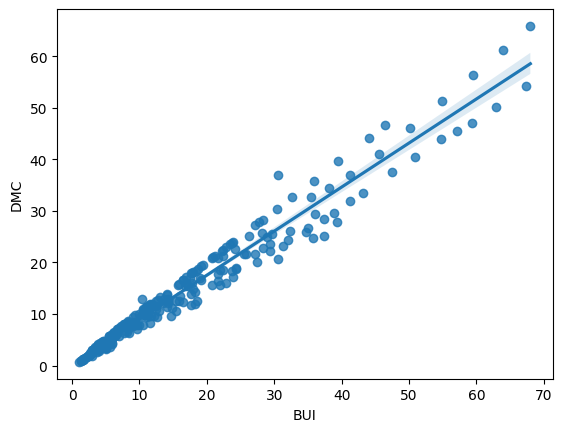

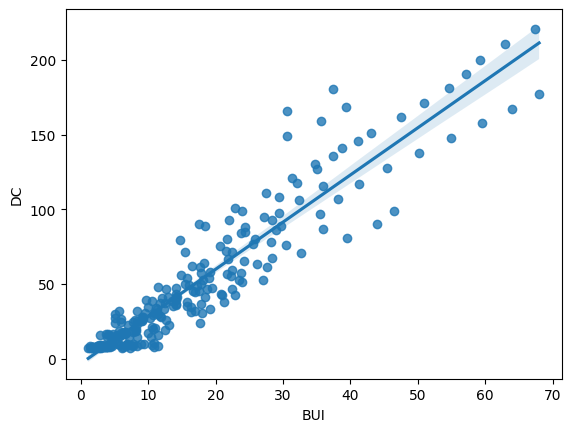

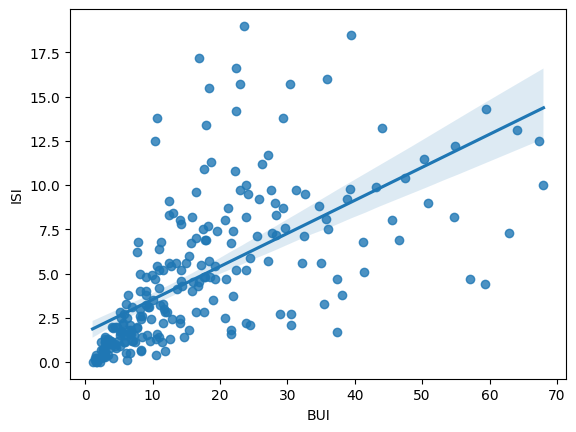

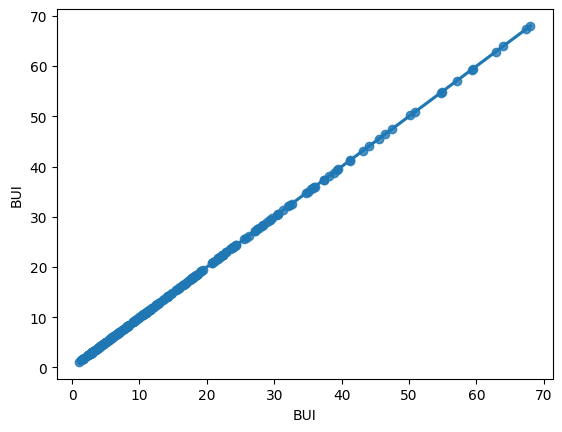

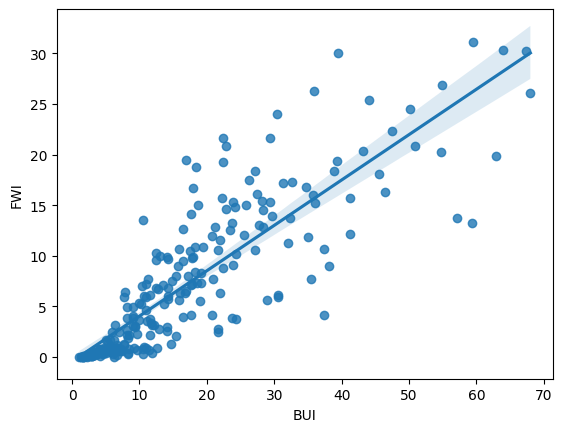

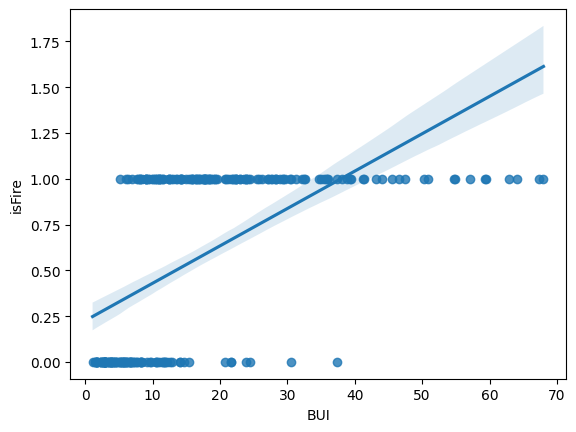

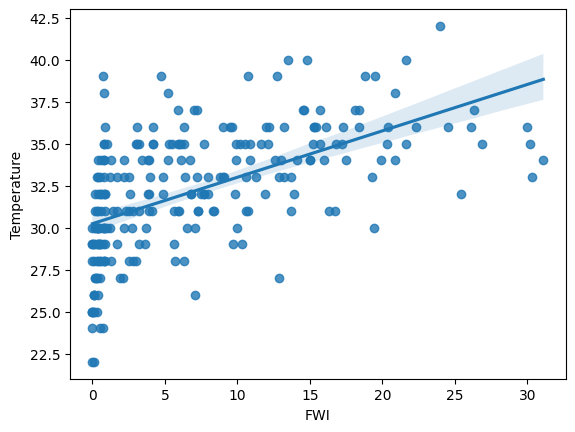

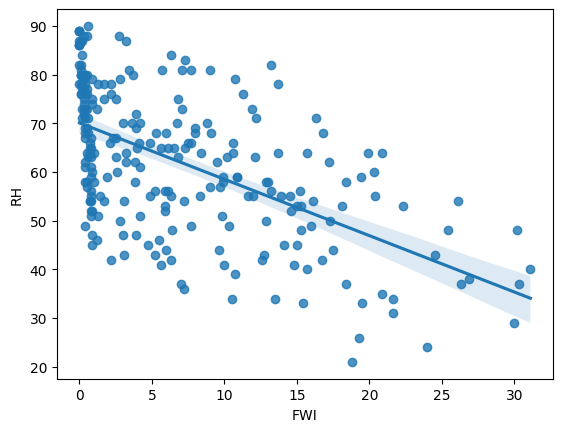

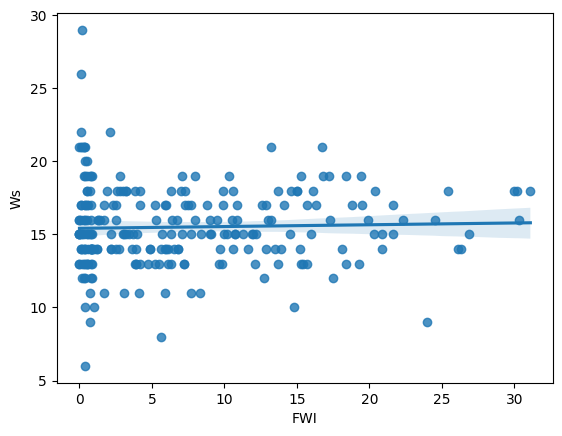

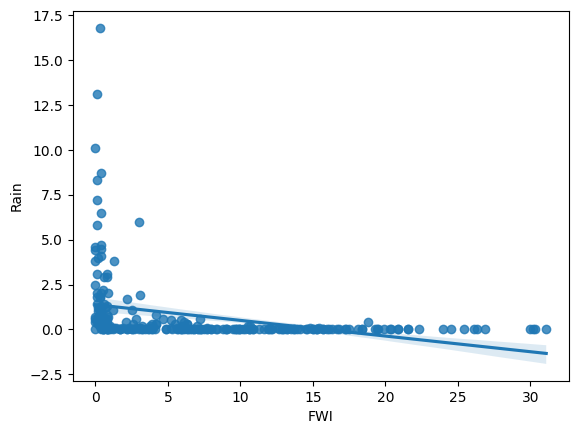

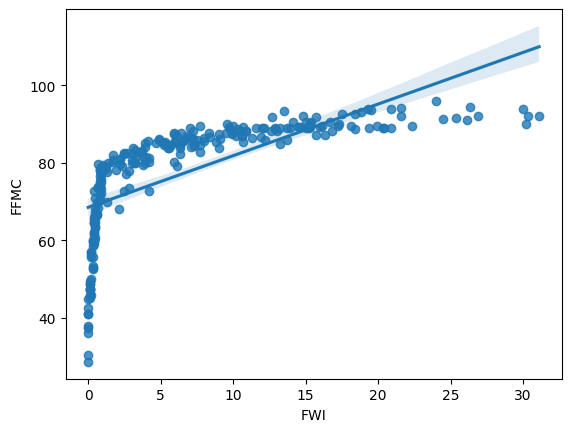

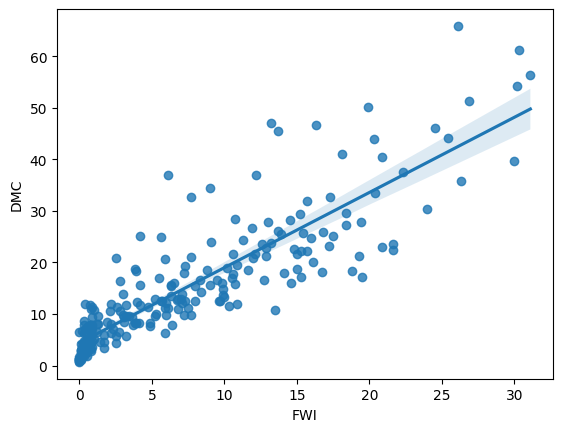

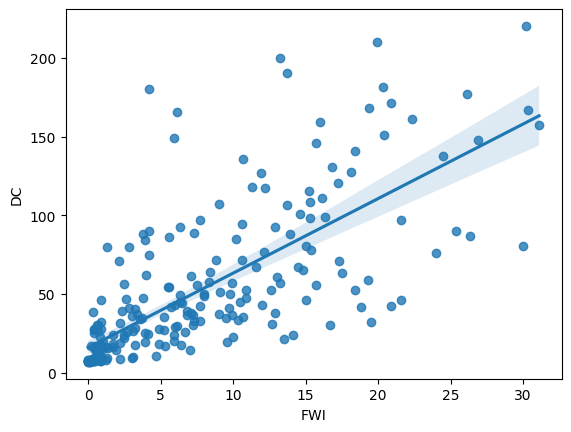

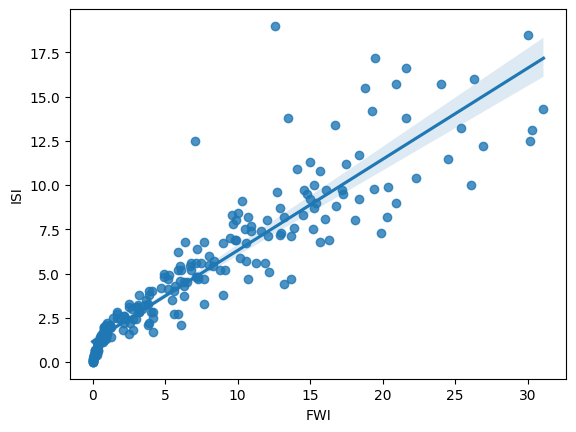

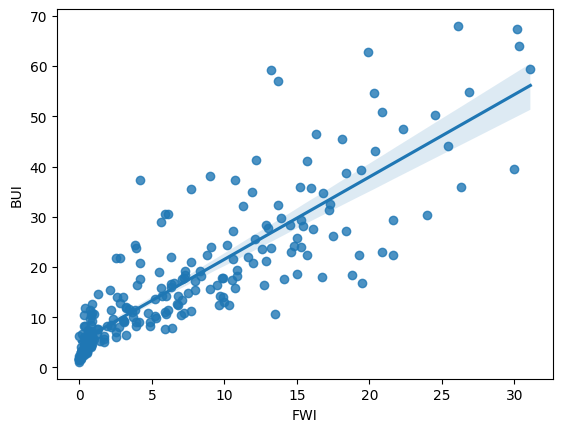

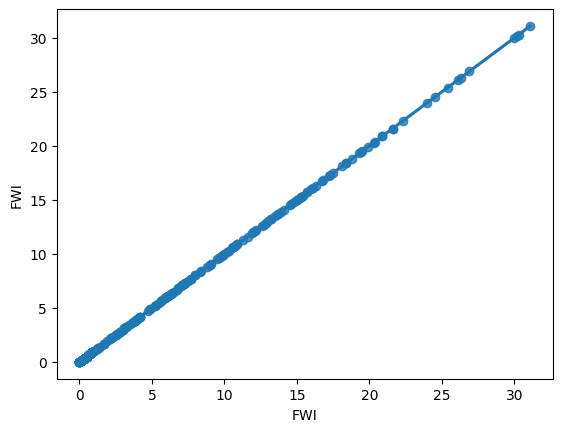

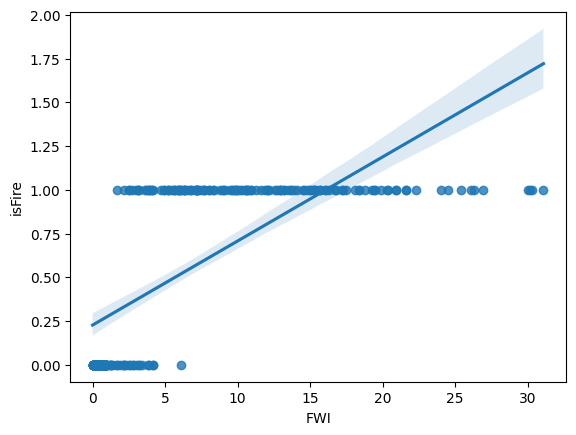

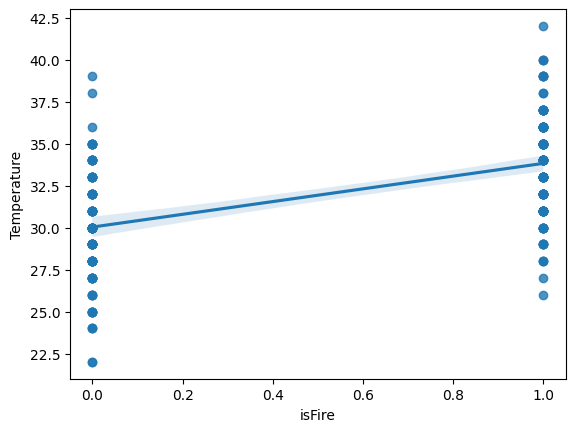

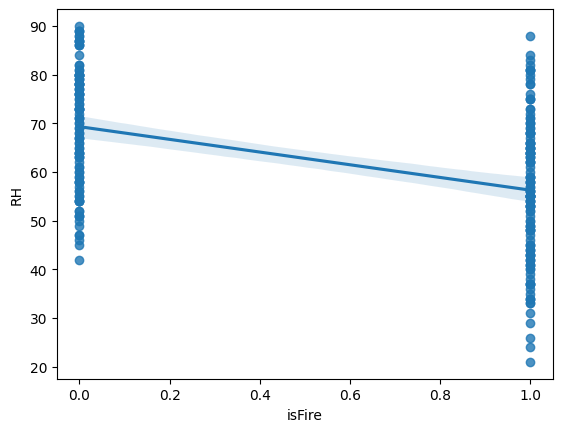

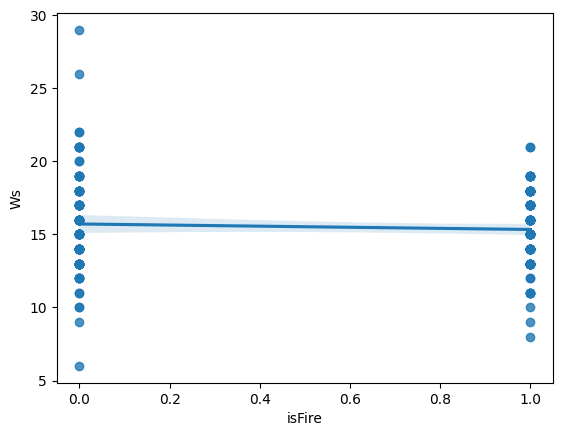

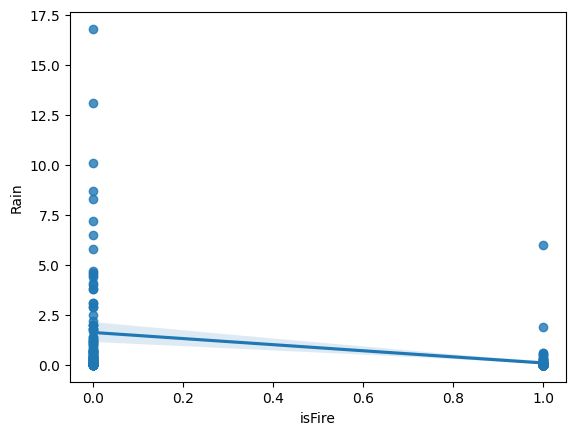

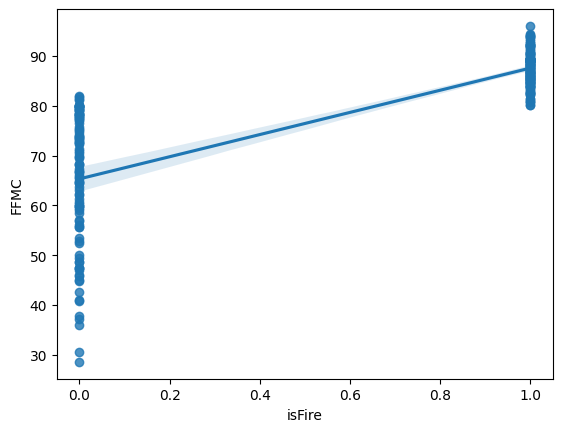

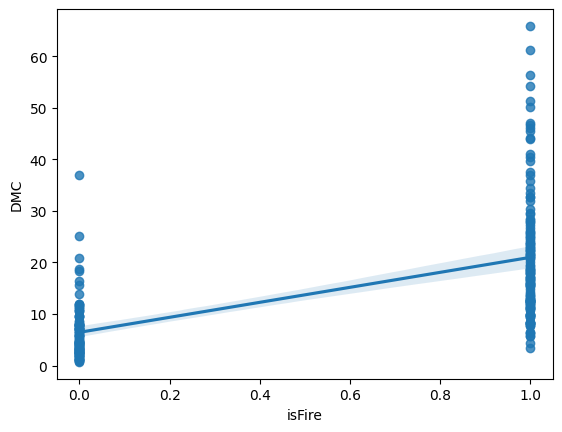

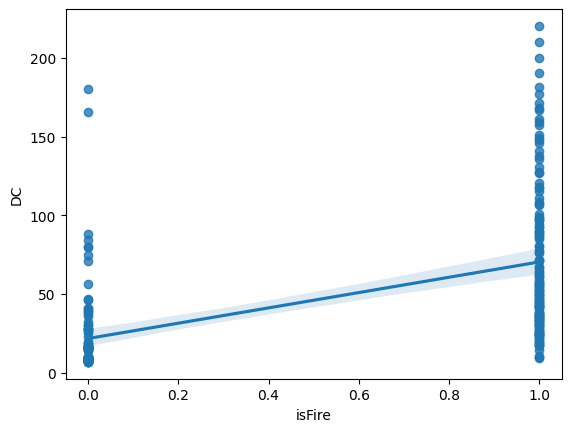

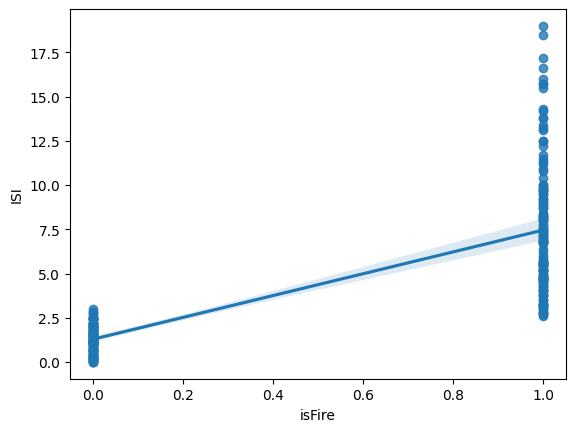

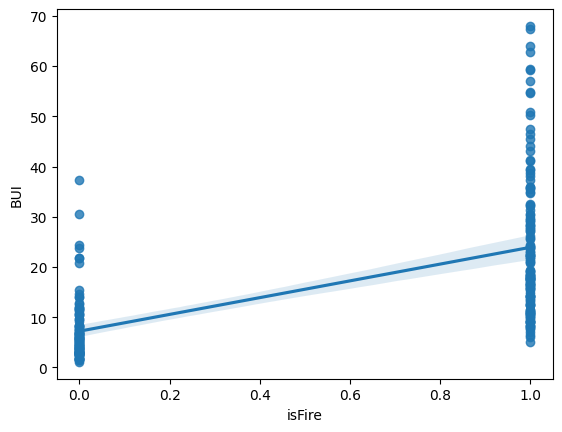

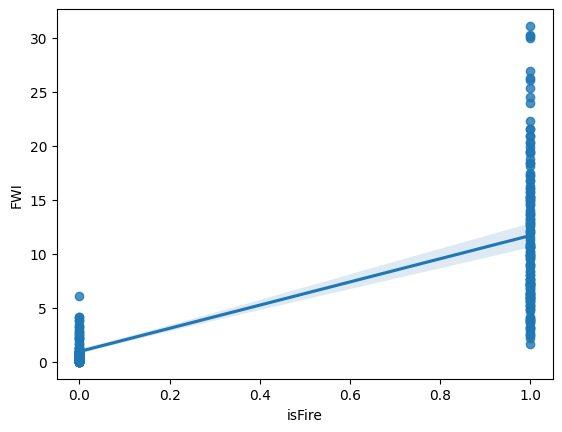

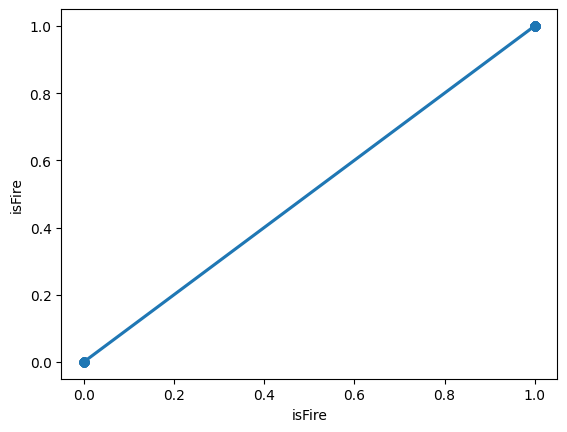

In [99]:
# raw testing
for col in filtered_df.columns:
    for row in filtered_df.columns:
        sns.regplot(data=filtered_df,y=row,x=col)
        plt.show()

<Axes: >

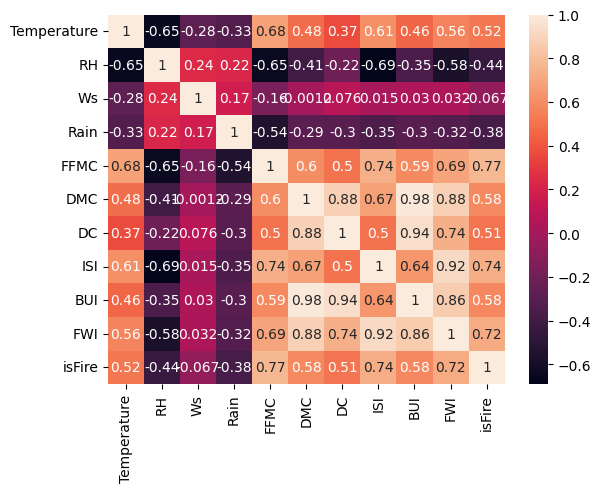

In [100]:
sns.heatmap(filtered_df.corr(),annot=True)

In [101]:
filtered_df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'isFire'],
      dtype='object')

In [119]:
filtered_df[[i for  i in filtered_df.columns if i != 'Temperature']]

RH    Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI  isFire
0    57.0  18.0   0.0  65.7   3.4   7.6  1.3   3.4  0.5       0
1    61.0  13.0   1.3  64.4   4.1   7.6  1.0   3.9  0.4       0
2    82.0  22.0  13.1  47.1   2.5   7.1  0.3   2.7  0.1       0
3    89.0  13.0   2.5  28.6   1.3   6.9  0.0   1.7  0.0       0
4    77.0  16.0   0.0  64.8   3.0  14.2  1.2   3.9  0.5       0
..    ...   ...   ...   ...   ...   ...  ...   ...  ...     ...
239  65.0  14.0   0.0  85.4  16.0  44.5  4.5  16.9  6.5       1
240  87.0  15.0   4.4  41.1   6.5   8.0  0.1   6.2  0.0       0
241  87.0  29.0   0.5  45.9   3.5   7.9  0.4   3.4  0.2       0
242  54.0  18.0   0.1  79.7   4.3  15.2  1.7   5.1  0.7       0
243  64.0  15.0   0.2  67.3   3.8  16.5  1.2   4.8  0.5       0

[244 rows x 10 columns]

In [120]:
filtered_df[[i for  i in filtered_df.columns if i != 'Temperature']]

RH    Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI  isFire
0    57.0  18.0   0.0  65.7   3.4   7.6  1.3   3.4  0.5       0
1    61.0  13.0   1.3  64.4   4.1   7.6  1.0   3.9  0.4       0
2    82.0  22.0  13.1  47.1   2.5   7.1  0.3   2.7  0.1       0
3    89.0  13.0   2.5  28.6   1.3   6.9  0.0   1.7  0.0       0
4    77.0  16.0   0.0  64.8   3.0  14.2  1.2   3.9  0.5       0
..    ...   ...   ...   ...   ...   ...  ...   ...  ...     ...
239  65.0  14.0   0.0  85.4  16.0  44.5  4.5  16.9  6.5       1
240  87.0  15.0   4.4  41.1   6.5   8.0  0.1   6.2  0.0       0
241  87.0  29.0   0.5  45.9   3.5   7.9  0.4   3.4  0.2       0
242  54.0  18.0   0.1  79.7   4.3  15.2  1.7   5.1  0.7       0
243  64.0  15.0   0.2  67.3   3.8  16.5  1.2   4.8  0.5       0

[244 rows x 10 columns]

In [121]:
from sklearn.model_selection import train_test_split
Y=filtered_df['Temperature']
X=filtered_df[[i for  i in filtered_df.columns if i != 'Temperature']]

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.33,random_state=42)

print(x_train, x_test, y_train, y_test)

       RH    Ws  Rain  FFMC   DMC     DC   ISI   BUI   FWI  isFire
114  54.0  11.0   0.5  73.7   7.9   30.4   1.2   9.6   0.7       0
65   65.0  13.0   0.0  86.8  11.1   29.7   5.2  11.5   6.1       1
132  42.0  21.0   0.0  90.6  18.2   30.5  13.4  18.0  16.7       1
207  40.0  18.0   0.0  92.1  56.3  157.5  14.3  59.5  31.1       1
162  56.0  15.0   2.9  74.8   7.1    9.5   1.6   6.8   0.8       0
..    ...   ...   ...   ...   ...    ...   ...   ...   ...     ...
106  82.0  15.0   0.4  44.9   0.9    7.3   0.2   1.4   0.0       0
14   80.0  17.0   3.1  49.4   3.0    7.4   0.4   3.0   0.1       0
92   76.0  17.0   7.2  46.0   1.3    7.5   0.2   1.8   0.1       0
179  57.0  16.0   0.0  87.5  15.7   37.6   6.7  15.7   9.0       1
102  77.0  21.0   1.8  58.5   1.9    8.4   1.1   2.4   0.3       0

[163 rows x 10 columns]        RH    Ws  Rain  FFMC   DMC     DC  ISI   BUI   FWI  isFire
24   64.0  15.0   0.0  86.7  14.2   63.8  5.7  18.3   8.4       1
6    54.0  13.0   0.0  88.2   9.9   30.

10

In [130]:
# Prediction for temperature
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(x_train, i) for i in range(x_train.shape[1])]

In [131]:
vif

[29.523083621350413,
 43.80279915707555,
 1.7288419620013853,
 44.38525076043845,
 142.63097912239255,
 38.84039520142207,
 37.54009116025739,
 307.0523004024394,
 57.256163295217895,
 6.415909991498031]

In [133]:
X.corr()

RH        Ws      Rain      FFMC       DMC        DC       ISI  \
RH      1.000000  0.236084  0.222968 -0.645658 -0.405133 -0.220344 -0.690637   
Ws      0.236084  1.000000  0.170169 -0.163255 -0.001246  0.076253  0.015248   
Rain    0.222968  0.170169  1.000000 -0.544045 -0.288548 -0.296808 -0.347105   
FFMC   -0.645658 -0.163255 -0.544045  1.000000  0.602391  0.503919  0.739730   
DMC    -0.405133 -0.001246 -0.288548  0.602391  1.000000  0.875362  0.674499   
DC     -0.220344  0.076253 -0.296808  0.503919  0.875362  1.000000  0.498926   
ISI    -0.690637  0.015248 -0.347105  0.739730  0.674499  0.498926  1.000000   
BUI    -0.348587  0.029756 -0.299171  0.589652  0.982073  0.941906  0.635891   
FWI    -0.577577  0.032315 -0.324369  0.690289  0.875827  0.738714  0.916343   
isFire -0.435023 -0.066529 -0.379449  0.770114  0.584188  0.507132  0.735511   

             BUI       FWI    isFire  
RH     -0.348587 -0.577577 -0.435023  
Ws      0.029756  0.032315 -0.066529  
Rain   -0.299171 -0.324369 -0.379449  
FFMC    0.589652  0.690289  0.770114  
DMC     0.982073  0.875827  0.584188  
DC      0.941906  0.738714  0.507132  
ISI     0.635891  0.916343  0.735511  
BUI     1.000000  0.857628  0.583882  
FWI     0.857628  1.000000  0.718079  
isFire  0.583882  0.718079  1.000000

# error- High colinearity found

# Feature Engineering- Feature Selection
- [Fire Weather Index (FWI) System | NWCG](https://www.nwcg.gov/publications/pms437/cffdrs/fire-weather-index-system)
Since FWI already combines all components of Selection ['BUI','ISI','DC','FFMC','DMC']. We drop them all together,

In [132]:
X[['RH','Ws','Rain']].corr()

RH        Ws      Rain
RH    1.000000  0.236084  0.222968
Ws    0.236084  1.000000  0.170169
Rain  0.222968  0.170169  1.000000

In [134]:
X.columns

Index(['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'isFire'], dtype='object')

In [139]:
# X=X.drop(['FFMC', 'DMC', 'DC', 'ISI', 'BUI'],axis=1)
X

RH    Ws  Rain  FWI  isFire
0    57.0  18.0   0.0  0.5       0
1    61.0  13.0   1.3  0.4       0
2    82.0  22.0  13.1  0.1       0
3    89.0  13.0   2.5  0.0       0
4    77.0  16.0   0.0  0.5       0
..    ...   ...   ...  ...     ...
239  65.0  14.0   0.0  6.5       1
240  87.0  15.0   4.4  0.0       0
241  87.0  29.0   0.5  0.2       0
242  54.0  18.0   0.1  0.7       0
243  64.0  15.0   0.2  0.5       0

[244 rows x 5 columns]

In [140]:
X.corr()

RH        Ws      Rain       FWI    isFire
RH      1.000000  0.236084  0.222968 -0.577577 -0.435023
Ws      0.236084  1.000000  0.170169  0.032315 -0.066529
Rain    0.222968  0.170169  1.000000 -0.324369 -0.379449
FWI    -0.577577  0.032315 -0.324369  1.000000  0.718079
isFire -0.435023 -0.066529 -0.379449  0.718079  1.000000

In [141]:
X.drop('isFire',axis=1,inplace=True)

In [142]:
X.corr()

RH        Ws      Rain       FWI
RH    1.000000  0.236084  0.222968 -0.577577
Ws    0.236084  1.000000  0.170169  0.032315
Rain  0.222968  0.170169  1.000000 -0.324369
FWI  -0.577577  0.032315 -0.324369  1.000000

In [143]:
filtered_df.corr()

Temperature        RH        Ws      Rain      FFMC       DMC  \
Temperature     1.000000 -0.654443 -0.278132 -0.326786  0.677491  0.483105   
RH             -0.654443  1.000000  0.236084  0.222968 -0.645658 -0.405133   
Ws             -0.278132  0.236084  1.000000  0.170169 -0.163255 -0.001246   
Rain           -0.326786  0.222968  0.170169  1.000000 -0.544045 -0.288548   
FFMC            0.677491 -0.645658 -0.163255 -0.544045  1.000000  0.602391   
DMC             0.483105 -0.405133 -0.001246 -0.288548  0.602391  1.000000   
DC              0.370511 -0.220344  0.076253 -0.296808  0.503919  0.875362   
ISI             0.607551 -0.690637  0.015248 -0.347105  0.739730  0.674499   
BUI             0.455504 -0.348587  0.029756 -0.299171  0.589652  0.982073   
FWI             0.564599 -0.577577  0.032315 -0.324369  0.690289  0.875827   
isFire          0.518119 -0.435023 -0.066529 -0.379449  0.770114  0.584188   

                   DC       ISI       BUI       FWI    isFire  
Temperature  0.370511  0.607551  0.455504  0.564599  0.518119  
RH          -0.220344 -0.690637 -0.348587 -0.577577 -0.435023  
Ws           0.076253  0.015248  0.029756  0.032315 -0.066529  
Rain        -0.296808 -0.347105 -0.299171 -0.324369 -0.379449  
FFMC         0.503919  0.739730  0.589652  0.690289  0.770114  
DMC          0.875362  0.674499  0.982073  0.875827  0.584188  
DC           1.000000  0.498926  0.941906  0.738714  0.507132  
ISI          0.498926  1.000000  0.635891  0.916343  0.735511  
BUI          0.941906  0.635891  1.000000  0.857628  0.583882  
FWI          0.738714  0.916343  0.857628  1.000000  0.718079  
isFire       0.507132  0.735511  0.583882  0.718079  1.000000

In [144]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.33,random_state=42)

print(x_train, x_test, y_train, y_test)

       RH    Ws  Rain   FWI
114  54.0  11.0   0.5   0.7
65   65.0  13.0   0.0   6.1
132  42.0  21.0   0.0  16.7
207  40.0  18.0   0.0  31.1
162  56.0  15.0   2.9   0.8
..    ...   ...   ...   ...
106  82.0  15.0   0.4   0.0
14   80.0  17.0   3.1   0.1
92   76.0  17.0   7.2   0.1
179  57.0  16.0   0.0   9.0
102  77.0  21.0   1.8   0.3

[163 rows x 4 columns]        RH    Ws  Rain   FWI
24   64.0  15.0   0.0   8.4
6    54.0  13.0   0.0   7.2
153  48.0  16.0   0.0   6.4
211  53.0  17.0   0.5   5.9
198  41.0  10.0   0.1  14.8
..    ...   ...   ...   ...
180  59.0  16.0   0.0  10.9
5    67.0  14.0   0.0   2.5
56   48.0  13.0   0.0  15.3
125  64.0  14.0   0.0   1.0
148  55.0  15.0   0.0  12.0

[81 rows x 4 columns] 114    32.0
65     34.0
132    31.0
207    34.0
162    34.0
       ... 
106    24.0
14     28.0
92     25.0
179    33.0
102    30.0
Name: Temperature, Length: 163, dtype: float64 24     31.0
6      33.0
153    33.0
211    35.0
198    40.0
       ... 
180    34.0
5      31.0
56    

In [145]:
# Normalization
from sklearn.discriminant_analysis import StandardScaler

scalar=StandardScaler()
scalar

StandardScaler()

In [146]:
x_train=scalar.fit_transform(x_train)
x_train

array([[-0.60257784, -1.68484146, -0.17054229, -0.8196431 ],
       [ 0.14460201, -0.93856657, -0.39436188, -0.08219052],
       [-1.41768313,  2.04653297, -0.39436188,  1.36540157],
       [-1.55353401,  0.92712064, -0.39436188,  3.33194176],
       [-0.46672696, -0.19229169,  0.90379174, -0.80598657],
       [ 0.82385642,  1.30025808,  0.14280514, -0.87426921],
       [ 1.43518539,  2.04653297,  0.14280514, -0.88792574],
       [ 0.00875113, -0.56542913, -0.39436188,  0.01340518],
       [-1.07805592, -0.93856657, -0.26007013, -0.38263416],
       [ 1.23140907, -0.19229169, -0.39436188, -0.45091681],
       [ 0.14460201, -0.56542913, -0.39436188, -0.02756441],
       [-0.19502519, -0.56542913, -0.30483404, -0.79233004],
       [ 1.57103627, -0.19229169,  4.12679384, -0.9152388 ],
       [-1.21390681, -0.93856657, -0.12577837, -0.27338193],
       [ 1.09555819,  0.92712064, -0.34959796, -0.53285598],
       [ 0.68800554,  0.5539832 , -0.34959796, -0.84695615],
       [ 0.28045289, -0.

In [147]:
x_test=scalar.transform(x_test) # transform instead of fit transform to avoid data leakage
x_test

array([[ 7.66765714e-02, -1.92291688e-01, -3.94361879e-01,
         2.31909648e-01],
       [-6.02577838e-01, -9.38566574e-01, -3.94361879e-01,
         6.80312985e-02],
       [-1.01013048e+00,  1.80845755e-01, -3.94361879e-01,
        -4.12209346e-02],
       [-6.70503279e-01,  5.53983197e-01, -1.70542289e-01,
        -1.09503580e-01],
       [-1.48560857e+00, -2.05797890e+00, -3.49597961e-01,
         1.10592751e+00],
       [ 7.66765714e-02, -2.43111635e+00,  1.42805137e-01,
        -8.19643095e-01],
       [-1.62145945e+00, -1.92291688e-01, -3.04834043e-01,
         5.46009818e-01],
       [ 1.16348363e+00, -5.65429131e-01,  5.00916482e-01,
        -9.01582270e-01],
       [ 1.09555819e+00, -1.31170402e+00, -3.94361879e-01,
        -7.92330037e-01],
       [ 6.88005540e-01, -1.31170402e+00,  4.11388646e-01,
        -8.74269212e-01],
       [ 8.91781863e-01,  2.04653297e+00, -3.94361879e-01,
        -8.60612683e-01],
       [-3.30876074e-01, -9.38566574e-01, -3.04834043e-01,
      

In [148]:
from sklearn.linear_model import LinearRegression


Linear=LinearRegression()
Linear

LinearRegression()

In [150]:
Linear.fit(x_train,y_train)    # x_train =  IDV & y_train = DV

LinearRegression()

In [152]:
Linear.coef_   

array([-1.59708578, -0.47123926, -0.52392495,  1.04493101])

In [153]:
Linear.singular_

array([17.3849721 , 13.15734327, 10.96303321,  7.51391816])

In [155]:
reg_pred= Linear.predict(x_test)
reg_pred

array([32.39869703, 33.66395704, 33.6731815 , 32.76631539, 36.6628209 ,
       32.07348383, 35.39207307, 29.18533043, 30.22870692, 30.37182987,
       28.90027144, 32.69793571, 33.23077387, 32.82588308, 34.55994649,
       31.32937126, 38.05792185, 28.67544064, 31.15290164, 33.05142427,
       29.57216567, 29.25171374, 34.6293955 , 29.88527817, 37.32846329,
       28.88056228, 32.06648763, 32.76404214, 31.53762978, 34.87418699,
       34.06411975, 31.47392387, 32.18512887, 33.08874255, 32.17684274,
       33.18431055, 29.51680869, 34.21886807, 30.31283193, 26.15446011,
       33.35668431, 33.40710277, 32.27426265, 28.17138254, 36.39567674,
       31.62336572, 30.10292525, 30.69919175, 35.73010957, 34.36042871,
       38.27705306, 30.07345095, 29.82887921, 34.35830038, 33.87329832,
       31.10874435, 38.75043069, 31.83376056, 30.87877767, 37.0887927 ,
       32.73613449, 30.34734856, 33.77568834, 31.06451611, 31.40709064,
       26.67952842, 32.80348875, 29.40185814, 37.85922287, 34.55

<Axes: xlabel='Temperature'>

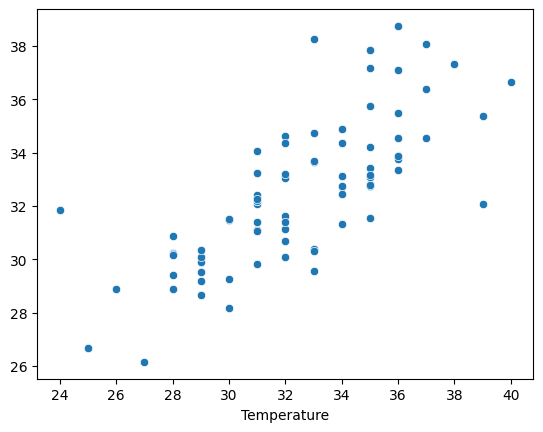

In [156]:
sns.scatterplot(x=y_test,y=reg_pred)

In [157]:
residual=y_test-reg_pred
residual

24    -1.398697
6     -0.663957
153   -0.673181
211    2.233685
198    3.337179
         ...   
180    0.877973
5     -0.407148
56     0.529266
125   -1.518544
148    2.111233
Name: Temperature, Length: 81, dtype: float64

C:\Users\Dvain\AppData\Local\Temp\ipykernel_10004\1108040850.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual)


<Axes: xlabel='Temperature', ylabel='Density'>

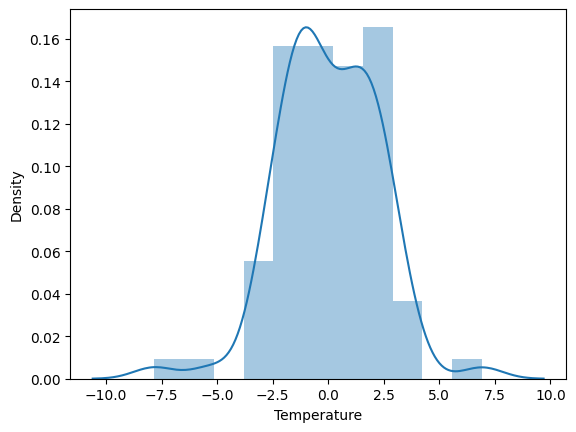

In [158]:
sns.distplot(residual)

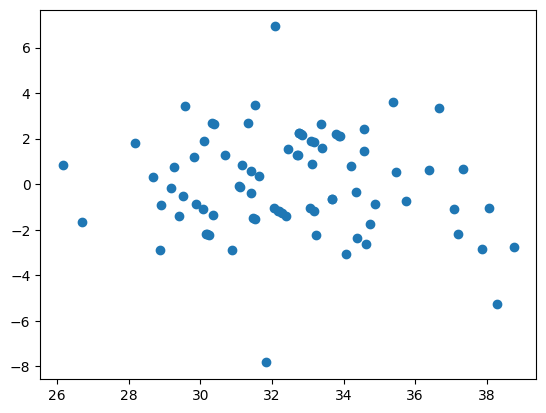

In [159]:
plt.scatter(reg_pred,residual)

# performance Metrix

In [160]:
mse=mean_squared_error(y_test,reg_pred)
mse

4.8835363096121736

In [161]:
mae=mean_absolute_error(y_test,reg_pred)
mae

1.7784715375519076

In [162]:
rmse=np.sqrt(mse)
rmse

2.2098724645581185

In [163]:
score=r2_score(y_test,reg_pred)
score

0.5453259297947288

In [164]:
adjusted_r_square=1-(1-score)*(len(y_test)-1) / (len(y_test)-x_test.shape[1]-1)
adjusted_r_square

0.5213957155733988

In [165]:
from sklearn.linear_model import Ridge,Lasso

lasso=Lasso()
ridge = Ridge(alpha=0.01)
ridge.fit(x_train,y_train)

Ridge(alpha=0.01)

In [202]:
ridge = Ridge(alpha=10)
ridge.fit(x_train,y_train)
pred_ridged=ridge.predict(x_test)
pred_ridged

array([32.39784075, 33.60492816, 33.5928943 , 32.71848437, 36.50535234,
       32.0734725 , 35.24956227, 29.29135321, 30.31790526, 30.43244108,
       29.00310567, 32.66910522, 33.17835905, 32.79407046, 34.49114522,
       31.3685073 , 37.86404581, 28.82565148, 31.21269644, 33.00650517,
       29.67002821, 29.36098401, 34.53547221, 29.93955107, 37.13965465,
       28.99268638, 32.07451737, 32.75346363, 31.47552593, 34.76356443,
       34.00153961, 31.45591068, 32.18867527, 33.07701059, 32.14677077,
       33.10624858, 29.60128348, 34.12063847, 30.31729678, 26.34423034,
       33.30570618, 33.35152647, 32.2239499 , 28.33105159, 36.24007495,
       31.6539633 , 30.20296424, 30.73758472, 35.56397299, 34.27886231,
       38.0801143 , 30.15172787, 29.94078645, 34.32464576, 33.80885418,
       31.18139988, 38.51692484, 31.80629282, 30.87684124, 36.89583001,
       32.7085745 , 30.38391691, 33.72298661, 31.11479501, 31.40819443,
       26.84495895, 32.7781856 , 29.52479733, 37.67259068, 34.42

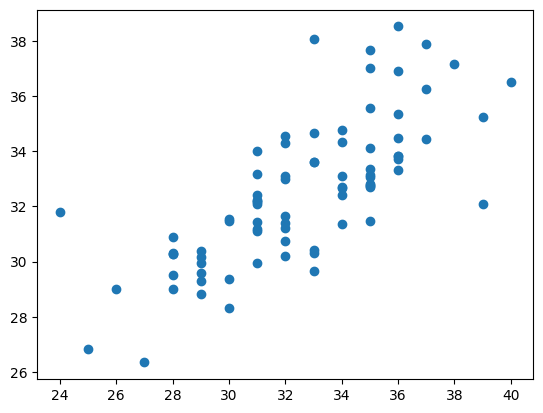

In [203]:
plt.scatter(y_test,pred_ridged)

In [204]:
score=r2_score(y_test,pred_ridged)

1-(1-score)*(len(y_test)-1) / (len(y_test)-x_test.shape[1]-1)

0.5241891144397846

In [188]:
lsso=Lasso(alpha=0.01)
lsso.fit(x_train,y_train)
pred_lassoed=lsso.predict(x_test)
pred_lassoed

array([32.39371633, 33.6521126 , 33.67053396, 32.76925456, 36.63181615,
       32.05984277, 35.3807937 , 29.19255347, 30.22444251, 30.37089386,
       28.92433956, 32.690628  , 33.21814347, 32.8119302 , 34.55079508,
       31.33030578, 38.02707123, 28.67846724, 31.14831601, 33.04521434,
       29.58267823, 29.26157324, 34.60986474, 29.90373508, 37.30582693,
       28.89366703, 32.06134059, 32.75707958, 31.55713689, 34.86868669,
       34.04504618, 31.47507726, 32.18739513, 33.08274245, 32.18065589,
       33.18217274, 29.5339303 , 34.20794764, 30.31806328, 26.20693122,
       33.34654998, 33.39327851, 32.28629421, 28.18365234, 36.37283601,
       31.62281987, 30.10794943, 30.70253346, 35.72129948, 34.34544703,
       38.24849287, 30.08028285, 29.83465758, 34.33763128, 33.87206028,
       31.11037234, 38.72706175, 31.84440164, 30.89474187, 37.0652277 ,
       32.73804385, 30.36413385, 33.76763254, 31.06230963, 31.41730567,
       26.71543702, 32.80242344, 29.41196716, 37.83109813, 34.56

In [189]:
score=r2_score(y_test,)

1-(1-score)*(len(y_test)-1) / (len(y_test)-x_test.shape[1]-1)

0.521516359522643